## Exploratory Data Analysis and Visualization: Australian Bureau of Statistics (ASB) Datasets.

In [1]:
#Importing both inclusive and non-inclusive libraries needed for analysis of the ABS datasets (Note: The non-inclusive packages are installed using pip and should be installed for successful execution)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#For processing multiple files from path
import glob 
import os
from itertools import cycle
#For writing data to Excel
import openpyxl 

#plt.style.use('bmh')
pd.options.display.float_format = '{:.3f}'.format

pd.set_option('display.max_rows', 1000)
pd.set_option('display.column', 1000)
pd.set_option('display.max_colwidth',1000)

## 1. Reading and Preparation of Data

### Function Definition for Processing Data

In [2]:
#Function to to extract census year details
def add_year (value):
   if "C11_" in value:
      return '2011'
   elif "C16_" in value:
      return '2016'
   elif "C21_" in value:
      return '2021'
   else:
      return 'Other'

In [3]:
#Function to to extract family "Family Status" information (Single-Parent or Couple Family) for the income dataset
def add_family_status (value):
   if "_1PF_" in value:
      return 'SingleParent Family'
   elif "_CF_" in value:
      return 'Couple Family'
   else:
      return 'Other'

In [4]:
#Function to extract income bracket values for the income dataset
def add_income_brackets (value):
   if "_149_" in value:
      return '149'
   elif "_299_" in value:
      return '299'
   elif "_399_" in value:
      return '399'
   elif "_499_" in value:
      return '499'
   elif "_599_" in value:
      return '599'
   elif "_649_" in value:
      return '649'
   elif "_799_" in value:
      return '799'
   elif "_899_" in value:
      return '899'
   elif "_999_" in value:
      return '999'
   elif "_1499_" in value:
      return '1499'
   elif "_1999_" in value:
      return '1999'
   elif "_2499_" in value:
      return '2499'
   elif "_2999_" in value:
      return '2999'
   elif "_3999_" in value:
      return '3999'
   elif "_4000more" in value:
      return '4000'
   elif "_inc_" in value  :
      return '0'
   elif "_Tot_" in value:
      return '0'
   else:
      return 'Other'

### 1.1 Reading and Preparing **Income Dataset**

##### a) Reading **Income Data**

In [5]:
#Reading income data from the source ASB files
#Since there are multple files in the income dataset, glob (non-inclusive package) and for loop is used to process these files instead of processing files individually and then contact

#Local path where the files are downloaded
path = '/Users/monali_patil/Monali/MDSI-Semester1/Data Science Using Python/Assignment/ABS-Analysis' 
income_files = glob.glob(os.path.join(path , "2021Census_T2*_AUST_STE.csv"))

#Defining income dataset to be used for analysis
df_income_details = pd.DataFrame()

for filename in income_files:
    df_income = pd.read_csv(filename)
    df_income = df_income.set_index('STE_CODE_2021').T  #Transposed dataset to process data more appropriately
    df_income.reset_index(inplace=True)
    df_income_details = pd.concat([df_income_details, df_income], ignore_index=True)


In [6]:
#Checking first few rows of the original data of income 
df_income.head()

STE_CODE_2021               index      1      2     3     4     5    6    7  \
0               C21_650_799_CF_1C   5935   5004  3250  1334  1526  491  277   
1               C21_650_799_CF_2C   4385   3949  2292   943  1156  283  213   
2               C21_650_799_CF_3C   2186   1643   954   420   488  126  126   
3              C21_650_799_CF_4mC   1158    901   623   250   278   65   74   
4                 C21_650_799_Tot  13662  11498  7122  2950  3452  967  682   

STE_CODE_2021    8  9  
0              143  3  
1               90  0  
2               54  0  
3               24  0  
4              313  9

##### b) Preparing **Income Data**

In [7]:
#Preparing income data
#Renaming column from default "index" to "Type_Value"
df_income_details = df_income_details.rename(columns = {'index':'Type_Value'}) 

#Renaming column headings as specific state names associated to the integer/numbers from 1 - 9
df_income_details.columns = ['Type_Value','New South Wales','Victoria','Queensland','South Australia','Western Australia','Tasmania','Northern Territory','Australian Capital Territory','Other Territories']

#Calulating the total of all the states for further analysis and adding it as a new column
df_income_details['total_all_states'] = df_income_details.iloc[:,1:10].sum(axis=1)

#Using add_income_brackets() function to process and accordingly adding a new column income_bracket
df_income_details['income_bracket'] = df_income_details['Type_Value'].map(add_income_brackets)

#Using add_year() function to process and accordingly adding a new column census_year
df_income_details['census_year'] = df_income_details['Type_Value'].map(add_year)

#Using add_family_status() function to process and accordingly adding a new column family_status
df_income_details['family_status'] = df_income_details['Type_Value'].map(add_family_status)

#Casting the data type for columns income_bracket and census_year to int for understanding datapoints and visualization
df_income_details = df_income_details.astype({'income_bracket': 'int','census_year': 'int'})

#Removing rows that has incomplete information (i.e. income_bracket = 0) These are the people who have not specified their income details while data was being collected by ASB 
df_income_details = df_income_details[df_income_details['income_bracket'] > 0]

#Sorting the income dataset by income_bracket and census_year attribute values
df_income_details = df_income_details.sort_values(by=['income_bracket', 'census_year'])


In [8]:
#Checking first few rows of the income data
df_income_details.head()

Type_Value  New South Wales  Victoria  Queensland  South Australia  \
60   C11_1_149_CF_1C              773       669         384              151   
61   C11_1_149_CF_2C              684       544         340              161   
62   C11_1_149_CF_3C              287       175         128               39   
63  C11_1_149_CF_4mC              105        80          40               22   
64     C11_1_149_Tot             1842      1474         893              370   

    Western Australia  Tasmania  Northern Territory  \
60                222        31                  37   
61                161        47                  22   
62                 82         6                   5   
63                 37         0                   0   
64                510        86                  65   

    Australian Capital Territory  Other Territories  total_all_states  \
60                            23                  0              2290   
61                            20                  0              1979   
62                             5                  0               727   
63                             3                  0               287   
64                            49                  0              5289   

    income_bracket  census_year  family_status  
60             149         2011  Couple Family  
61             149         2011  Couple Family  
62             149         2011  Couple Family  
63             149         2011  Couple Family  
64             149         2011          Other

#### a) Reading **Migration Data**

In [9]:
#Reading migration data (collected based on country of birth by ASB) from source ASB files

#Local path where the files are downloaded
path = '/Users/monali_patil/Monali/MDSI-Semester1/Data Science Using Python/Assignment/ABS-Analysis'
migration_files = glob.glob(os.path.join(path , "2021Census_T08*_AUST_STE.csv"))

#Defining migration dataset to be used for analysis
df_migration_details = pd.DataFrame()

for filename in migration_files:
    print(filename)
    df_migration = pd.read_csv(filename)
    df_migration = df_migration.set_index('STE_CODE_2021').T
    df_migration.reset_index(inplace=True)
    df_migration_details = pd.concat([df_migration_details, df_migration], ignore_index=True)


#Reading this file to get the ISO codes(country abbreviations) of various Countries which would be useful while generation graphs/plots
df_country_codes = pd.read_csv('/Users/monali_patil/Monali/MDSI-Semester1/Data Science Using Python/Assignment/ABS-Analysis/country_codes.csv')  

/Users/monali_patil/Monali/MDSI-Semester1/Data Science Using Python/Assignment/ABS-Analysis/2021Census_T08A_AUST_STE.csv
/Users/monali_patil/Monali/MDSI-Semester1/Data Science Using Python/Assignment/ABS-Analysis/2021Census_T08B_AUST_STE.csv


In [10]:
#Checking first few rows of the original data of migration
df_migration.head()

STE_CODE_2021              index      1      2      3     4     5     6    7  \
0              Netherlands_C11_P  18214  21636  14988  7282  9978  2378  449   
1              Netherlands_C16_M   8538   9982   7237  3247  4585  1106  220   
2              Netherlands_C16_F   8360   9834   6832  3353  4552  1091  202   
3              Netherlands_C16_P  16898  19816  14066  6597  9130  2196  421   
4              Netherlands_C21_M   7865   9268   7022  3005  4361  1064  165   

STE_CODE_2021     8  9  
0              1120  0  
1               491  0  
2               550  3  
3              1041  3  
4               473  3

#### b) Preparing **Migration Data**

In [11]:
#Preparing migration data
#Renaming column from default "index" to "Type_Value"
df_migration_details = df_migration_details.rename(columns = {'index':'Type_Value'})

#Adding column headings as specific state names associated to the integer/numbers from 1 - 9
df_migration_details.columns = ['Type_Value','New South Wales','Victoria','Queensland','South Australia','Western Australia','Tasmania','Northern Territory','Australian Capital Territory','Other Territories']

#Using add_year() function to process and accordingly adding new column census_year
df_migration_details['census_year'] = df_migration_details['Type_Value'].map(add_year)

#Extracting gender information from index/Type_Value column value and populating it as a new column
df_migration_details['sex'] = df_migration_details['Type_Value'].str[-1:]

#Extracting country information from index/Type_Value column value and populating it as a new column
df_migration_details['country'] = df_migration_details['Type_Value'].str[:-6]

#Adding total of all states as new column
df_migration_details['total_all_states'] = df_migration_details.iloc[:,1:10].sum(axis=1)

#Cleaning and correcting heading and tailing characters in the country attribute, For example, Aus to Australia, Unitd Kingdom to United Kingdom
df_migration_details['country'] = df_migration_details['country'].str.replace('_', ' ', regex=True)
df_migration_details['country'] = df_migration_details['country'].str.replace('Iran C\w\d', 'Iran', regex=True)
df_migration_details['country'] = df_migration_details['country'].str.replace('\t', '', regex=True)
df_migration_details['country'].mask(df_migration_details['country'] == 'Unitd Kingdom', 'United Kingdom', inplace=True)
df_migration_details['country'].mask(df_migration_details['country'] == 'Unit Sts Amer', 'United States', inplace=True)
df_migration_details['country'].mask(df_migration_details['country'] == 'Korea', 'Korea, South', inplace=True)
df_migration_details['country'].mask(df_migration_details['country'] == 'Aust', 'Australia', inplace=True)

#Merging the country codes with migration dataset
df_migration_details = pd.merge(df_migration_details,df_country_codes,on='country',how='left')


In [12]:
#Checking first few rows of the migration data
df_migration_details.head()

Type_Value  New South Wales  Victoria  Queensland  South Australia  \
0  Afghanistan_C11_M             4781      5726        1178             1976   
1  Afghanistan_C11_F             4168      4214         626             1313   
2  Afghanistan_C11_P             8949      9947        1805             3288   
3  Afghanistan_C16_M             7800     10983        2032             3862   
4  Afghanistan_C16_F             5235      7138        1352             2453   

   Western Australia  Tasmania  Northern Territory  \
0               2684        15                 176   
1               1236        25                   7   
2               3927        45                 187   
3               3398       150                  51   
4               1712       152                   7   

   Australian Capital Territory  Other Territories census_year sex  \
0                           182                113        2011   M   
1                           158                  6        2011   F   
2                           344                116        2011   P   
3                           255                  3        2016   M   
4                           215                  0        2016   F   

       country  total_all_states iso_code  
0  Afghanistan             16831      AFG  
1  Afghanistan             11753      AFG  
2  Afghanistan             28608      AFG  
3  Afghanistan             28534      AFG  
4  Afghanistan             18264      AFG

## 2. Exploring and Understanding Data

### 2.1 Exploring **Income Dataset**

In [13]:
#First 5 rows of the income dataset
df_income_details.head(5)


Type_Value  New South Wales  Victoria  Queensland  South Australia  \
60   C11_1_149_CF_1C              773       669         384              151   
61   C11_1_149_CF_2C              684       544         340              161   
62   C11_1_149_CF_3C              287       175         128               39   
63  C11_1_149_CF_4mC              105        80          40               22   
64     C11_1_149_Tot             1842      1474         893              370   

    Western Australia  Tasmania  Northern Territory  \
60                222        31                  37   
61                161        47                  22   
62                 82         6                   5   
63                 37         0                   0   
64                510        86                  65   

    Australian Capital Territory  Other Territories  total_all_states  \
60                            23                  0              2290   
61                            20                  0              1979   
62                             5                  0               727   
63                             3                  0               287   
64                            49                  0              5289   

    income_bracket  census_year  family_status  
60             149         2011  Couple Family  
61             149         2011  Couple Family  
62             149         2011  Couple Family  
63             149         2011  Couple Family  
64             149         2011          Other

In [14]:
#Sample of any 5 rows of the income dataset
df_income_details.sample(5)

Type_Value  New South Wales  Victoria  Queensland  \
177        C16_800_999_CF_3C             4673      3867        2712   
394        C16_2000_2499_Tot            21822     15091       12089   
408  C16_4000more_1PF_4mo_ch              233       110          74   
149            C16_1_149_Tot             1583      1603         953   
153       C16_150_299_CF_4mC              246       238         103   

     South Australia  Western Australia  Tasmania  Northern Territory  \
177             1063               1143       366                 148   
394             3911               6843      1051                 648   
408               17                 43         0                  10   
149              376                542        83                 176   
153               55                 71        11                  34   

     Australian Capital Territory  Other Territories  total_all_states  \
177                           106                  0             14078   
394                          1815                 14             63284   
408                            13                  0               500   
149                            45                  0              5361   
153                             6                  0               764   

     income_bracket  census_year        family_status  
177             999         2016        Couple Family  
394            2499         2016                Other  
408            4000         2016  SingleParent Family  
149             149         2016                Other  
153             299         2016        Couple Family

In [15]:
#Last/Tailing 5 rows of the income dataset
df_income_details.tail(5)

Type_Value  New South Wales  Victoria  Queensland  \
490          C21_4000more_CF_1C            77120     52665       34347   
491          C21_4000more_CF_2C           122225     88184       54160   
492          C21_4000more_CF_3C            43091     30467       19661   
493  C21_4000more_Cou_fa_4mo_ch            10722      6700        5141   
494            C21_4000more_Tot           253161    178012      113308   

     South Australia  Western Australia  Tasmania  Northern Territory  \
490             9837              22209      2386                1677   
491            16584              35284      3543                2003   
492             5702              12409      1245                 719   
493             1325               2934       346                 278   
494            33441              72840      7514                4682   

     Australian Capital Territory  Other Territories  total_all_states  \
490                          6863                 12            207116   
491                         10874                 21            332878   
492                          3249                 10            116553   
493                           693                  0             28139   
494                         21685                 52            684695   

     income_bracket  census_year  family_status  
490            4000         2021  Couple Family  
491            4000         2021  Couple Family  
492            4000         2021  Couple Family  
493            4000         2021          Other  
494            4000         2021          Other

In [16]:
#Information of the income dataset
df_income_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 60 to 494
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Type_Value                    390 non-null    object
 1   New South Wales               390 non-null    int64 
 2   Victoria                      390 non-null    int64 
 3   Queensland                    390 non-null    int64 
 4   South Australia               390 non-null    int64 
 5   Western Australia             390 non-null    int64 
 6   Tasmania                      390 non-null    int64 
 7   Northern Territory            390 non-null    int64 
 8   Australian Capital Territory  390 non-null    int64 
 9   Other Territories             390 non-null    int64 
 10  total_all_states              390 non-null    int64 
 11  income_bracket                390 non-null    int64 
 12  census_year                   390 non-null    int64 
 13  family_status      

In [17]:
#Describing the number of rows and columns in the income dataset
print(df_income_details.shape)
print("Thus, the income dataset consist of:")
print("Rows: {}".format(df_income_details.shape[0]))
print("Columns: {}".format(df_income_details.shape[1]))

(390, 14)
Thus, the income dataset consist of:
Rows: 390
Columns: 14


In [18]:
#Attributes of the income dataset
print(df_income_details.columns)

Index(['Type_Value', 'New South Wales', 'Victoria', 'Queensland',
       'South Australia', 'Western Australia', 'Tasmania',
       'Northern Territory', 'Australian Capital Territory',
       'Other Territories', 'total_all_states', 'income_bracket',
       'census_year', 'family_status'],
      dtype='object')


### 2.2 Exploring **Migration Dataset**

In [19]:
#First/Heading 5 rows of the migration dataset
df_migration_details.head(5)

Type_Value  New South Wales  Victoria  Queensland  South Australia  \
0  Afghanistan_C11_M             4781      5726        1178             1976   
1  Afghanistan_C11_F             4168      4214         626             1313   
2  Afghanistan_C11_P             8949      9947        1805             3288   
3  Afghanistan_C16_M             7800     10983        2032             3862   
4  Afghanistan_C16_F             5235      7138        1352             2453   

   Western Australia  Tasmania  Northern Territory  \
0               2684        15                 176   
1               1236        25                   7   
2               3927        45                 187   
3               3398       150                  51   
4               1712       152                   7   

   Australian Capital Territory  Other Territories census_year sex  \
0                           182                113        2011   M   
1                           158                  6        2011   F   
2                           344                116        2011   P   
3                           255                  3        2016   M   
4                           215                  0        2016   F   

       country  total_all_states iso_code  
0  Afghanistan             16831      AFG  
1  Afghanistan             11753      AFG  
2  Afghanistan             28608      AFG  
3  Afghanistan             28534      AFG  
4  Afghanistan             18264      AFG

In [20]:
#Sample of any 5 rows of the migration dataset
df_migration_details.sample(5)

Type_Value  New South Wales  Victoria  Queensland  \
338             Tot_C16_P          7480230   5926624     4703192   
221        Pakistan_C16_P            24523     21125        4669   
323  Born_elsewhere_C21_P           400653    349046      196115   
91        Hong_Kong_C11_F            20381      9459        4513   
95        Hong_Kong_C16_P            42347     21640       10751   

     South Australia  Western Australia  Tasmania  Northern Territory  \
338          1676653            2474414    509961              228838   
221             3442               5442       350                 351   
323            62617             131439     10943                8421   
91              1393               2424       174                 126   
95              3575               6130       459                 285   

     Australian Capital Territory  Other Territories census_year sex  \
338                        397393               4583        2016   P   
221                          1997                  8        2016   P   
323                         23101                190        2021   P   
91                            713                  0        2011   F   
95                           1684                 15        2016   P   

            country  total_all_states iso_code  
338             Tot          23401888      NaN  
221        Pakistan             61907      PAK  
323  Born elsewhere           1182525      NaN  
91        Hong Kong             39183      HKG  
95        Hong Kong             86886      HKG

In [21]:
#Last/Tailing 5 rows of the migration dataset
df_migration_details.tail(5)

Type_Value  New South Wales  Victoria  Queensland  South Australia  \
337  Tot_C16_F          3794216   3018545     2381302           850653   
338  Tot_C16_P          7480230   5926624     4703192          1676653   
339  Tot_C21_M          3984166   3200963     2540404           878592   
340  Tot_C21_F          4087995   3302528     2615736           902924   
341  Tot_C21_P          8072163   6503491     5156138          1781516   

     Western Australia  Tasmania  Northern Territory  \
337            1235996    260480              110269   
338            2474414    509961              228838   
339            1322855    273765              117526   
340            1337171    283804              115075   
341            2660026    557571              232605   

     Australian Capital Territory  Other Territories census_year sex country  \
337                        201660               2119        2016   F     Tot   
338                        397393               4583        2016   P     Tot   
339                        224361               2520        2021   M     Tot   
340                        230140               2268        2021   F     Tot   
341                        454499               4788        2021   P     Tot   

     total_all_states iso_code  
337          11855240      NaN  
338          23401888      NaN  
339          12545152      NaN  
340          12877641      NaN  
341          25422797      NaN

In [22]:
#Information of the migration dataset
df_migration_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 341
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Type_Value                    342 non-null    object
 1   New South Wales               342 non-null    int64 
 2   Victoria                      342 non-null    int64 
 3   Queensland                    342 non-null    int64 
 4   South Australia               342 non-null    int64 
 5   Western Australia             342 non-null    int64 
 6   Tasmania                      342 non-null    int64 
 7   Northern Territory            342 non-null    int64 
 8   Australian Capital Territory  342 non-null    int64 
 9   Other Territories             342 non-null    int64 
 10  census_year                   342 non-null    object
 11  sex                           342 non-null    object
 12  country                       342 non-null    object
 13  total_all_states    

In [23]:
#Describing the number of rows and columns in the migration dataset
print(df_migration_details.shape)
print("Thus, the migration dataset consist of:")
print("Rows: {}".format(df_migration_details.shape[0]))
print("Columns: {}".format(df_migration_details.shape[1]))

(342, 15)
Thus, the migration dataset consist of:
Rows: 342
Columns: 15


In [24]:
#Attributes of the migration dataset
print(df_migration_details.columns)

Index(['Type_Value', 'New South Wales', 'Victoria', 'Queensland',
       'South Australia', 'Western Australia', 'Tasmania',
       'Northern Territory', 'Australian Capital Territory',
       'Other Territories', 'census_year', 'sex', 'country',
       'total_all_states', 'iso_code'],
      dtype='object')



## 3. Checking Null Values


### 3.1 Examining Null Values in **Income Dataset**

In [25]:
#Checking if any null values in the income dataset
df_income_details.isnull().sum()

Type_Value                      0
New South Wales                 0
Victoria                        0
Queensland                      0
South Australia                 0
Western Australia               0
Tasmania                        0
Northern Territory              0
Australian Capital Territory    0
Other Territories               0
total_all_states                0
income_bracket                  0
census_year                     0
family_status                   0
dtype: int64

### 3.2 Examining Null Values in **Migration Dataset**

In [26]:
#Checking if any null values in the migration dataset
df_migration_details.isnull().sum()

Type_Value                       0
New South Wales                  0
Victoria                         0
Queensland                       0
South Australia                  0
Western Australia                0
Tasmania                         0
Northern Territory               0
Australian Capital Territory     0
Other Territories                0
census_year                      0
sex                              0
country                          0
total_all_states                 0
iso_code                        36
dtype: int64

## 4. Checking Missing Values

### 4.1 Examining Missing Values in **Income Dataset**

In [27]:
#Checking if any missing values in the income dataset
df_income_details.isna().sum()

Type_Value                      0
New South Wales                 0
Victoria                        0
Queensland                      0
South Australia                 0
Western Australia               0
Tasmania                        0
Northern Territory              0
Australian Capital Territory    0
Other Territories               0
total_all_states                0
income_bracket                  0
census_year                     0
family_status                   0
dtype: int64

<AxesSubplot:>

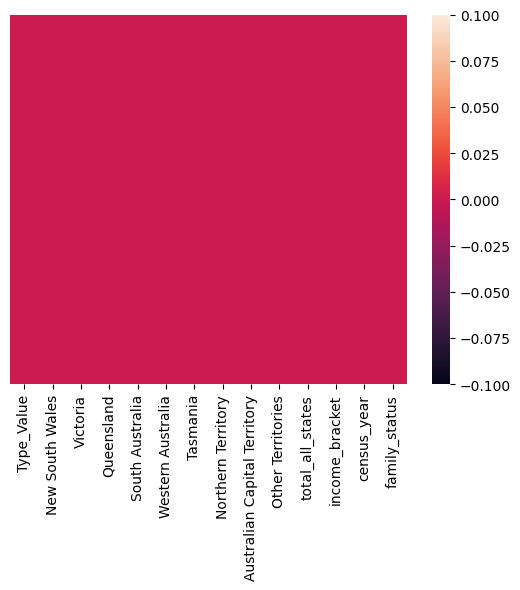

In [28]:
sns.heatmap(df_income_details.isnull(), yticklabels=False, cbar=True)

### 4.2 Examining Missing Values in **Migration Dataset**

In [29]:
#Checking if any missing values in the migration dataset
df_migration_details.isna().sum()

Type_Value                       0
New South Wales                  0
Victoria                         0
Queensland                       0
South Australia                  0
Western Australia                0
Tasmania                         0
Northern Territory               0
Australian Capital Territory     0
Other Territories                0
census_year                      0
sex                              0
country                          0
total_all_states                 0
iso_code                        36
dtype: int64

<AxesSubplot:>

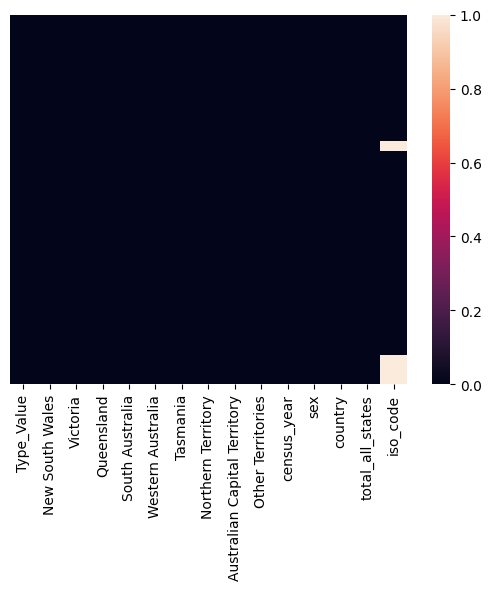

In [30]:
sns.heatmap(df_migration_details.isnull(), yticklabels=False, cbar=True)

## 5. Checking Duplicate Values

### 5.1 Examining Duplicate Values in **Income Dataset**

In [31]:
#Checking if any duplicate values in the income dataset
df_duplicate_rows = df_income_details[df_income_details.duplicated()]
print("The number of duplicate rows in the income dataset:", df_duplicate_rows.shape)

The number of duplicate rows in the income dataset: (0, 14)


### 5.2 Examining Duplicate Values in **Migration Dataset**

In [32]:
#Checking if any duplicate values in the migration dataset
df_duplicate_mig_rows = df_migration_details[df_migration_details.duplicated()]
print("The number of duplicate rows in the migration dataset: {}".format(df_duplicate_mig_rows.shape))

The number of duplicate rows in the migration dataset: (0, 15)


#### Observation: 
* There are no null and duplicate values in the datasets: income and migration as this is aggregated figures of people collected by ASB.

* The missing values in the migration dataset belong to the iso_code attribute, which is an abbreviation of country names added to only generate one world map wherein iso_code is essential. Not taking any action on these missing values as this iso_code attribute would not be used for analysis(using country attribute). However, no missing values are present in the income dataset.

## 6. Checking Statistics of Attributes with Different Datatype

### 6.1 Examining Statistics of Attributes in **Income Dataset**

In [33]:
#Information of all columns of the income dataset
df_income_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 60 to 494
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Type_Value                    390 non-null    object
 1   New South Wales               390 non-null    int64 
 2   Victoria                      390 non-null    int64 
 3   Queensland                    390 non-null    int64 
 4   South Australia               390 non-null    int64 
 5   Western Australia             390 non-null    int64 
 6   Tasmania                      390 non-null    int64 
 7   Northern Territory            390 non-null    int64 
 8   Australian Capital Territory  390 non-null    int64 
 9   Other Territories             390 non-null    int64 
 10  total_all_states              390 non-null    int64 
 11  income_bracket                390 non-null    int64 
 12  census_year                   390 non-null    int64 
 13  family_status      

#### Observation: 
* In the income dataset, attributes are of an object(character/string) and int64(integer) data type.

In [34]:
#Checking statistics for columns of the object(character/string) data type
df_income_details.describe(include=['object'])


Type_Value        family_status
count               390                  390
unique              351                    3
top     C16_800_999_Tot  SingleParent Family
freq                  2                  156

In [35]:
#Checking statistics for columns of the int64(integer) data type
df_income_details.describe(include=['int64'])


New South Wales   Victoria  Queensland  South Australia  \
count          390.000    390.000     390.000          390.000   
mean         16395.477  12926.654    9826.756         3528.997   
std          28726.813  22752.977   16628.744         5897.036   
min             47.000     57.000      32.000            7.000   
25%           1361.750   1034.750     771.250          287.000   
50%           4927.000   3669.500    2886.000         1021.500   
75%          17641.000  13451.000   10621.000         3924.500   
max         253161.000 178012.000  113308.000        33700.000   

       Western Australia  Tasmania  Northern Territory  \
count            390.000   390.000             390.000   
mean            5023.554  1042.990             425.218   
std             9029.274  1703.097             649.511   
min               16.000     0.000               0.000   
25%              400.750    77.000              73.250   
50%             1439.500   314.500             181.500   
75%             5078.500  1234.250             471.750   
max            72840.000 10870.000            4682.000   

       Australian Capital Territory  Other Territories  total_all_states  \
count                       390.000            390.000           390.000   
mean                        877.790              6.113         50053.549   
std                        1970.362             11.687         86598.472   
min                           0.000              0.000           207.000   
25%                          46.000              0.000          4224.500   
50%                         184.500              0.000         14514.500   
75%                         750.250              8.000         54442.500   
max                       21685.000             75.000        684695.000   

       income_bracket  census_year  
count         390.000      390.000  
mean         1599.077     2016.000  
std          1326.315        4.088  
min           149.000     2011.000  
25%           499.000     2011.000  
50%           999.000     2016.000  
75%          2499.000     2021.000  
max          4000.000     2021.000

### 6.2 Examining Statistics of Attributes in **Migration Dataset**

In [36]:
#Information of all columns of the migration dataset
df_migration_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 341
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Type_Value                    342 non-null    object
 1   New South Wales               342 non-null    int64 
 2   Victoria                      342 non-null    int64 
 3   Queensland                    342 non-null    int64 
 4   South Australia               342 non-null    int64 
 5   Western Australia             342 non-null    int64 
 6   Tasmania                      342 non-null    int64 
 7   Northern Territory            342 non-null    int64 
 8   Australian Capital Territory  342 non-null    int64 
 9   Other Territories             342 non-null    int64 
 10  census_year                   342 non-null    object
 11  sex                           342 non-null    object
 12  country                       342 non-null    object
 13  total_all_states    

#### Observation: 
* The attributes of the migration dataset are of an object(character/string) and int64(integer) data type.

In [37]:
#Checking statistics for columns of the object(character/string) data type
df_migration_details.describe(include=['object'])

Type_Value census_year  sex      country iso_code
count                 342         342  342          342      306
unique                342           3    3           38       34
top     Afghanistan_C11_M        2011    M  Afghanistan      AFG
freq                    1         114  114            9        9

In [38]:
#Checking statistics for columns of the int64(integer) data type
df_migration_details.describe(include=['int64'])

New South Wales    Victoria  Queensland  South Australia  \
count          342.000     342.000     342.000          342.000   
mean        262807.617  208001.713  165989.050        59119.950   
std        1004130.011  794325.064  652445.298       231972.462   
min           3704.000    1729.000     583.000          358.000   
25%          13010.250    8153.000    3381.500         1436.250   
50%          21250.500   14681.500    7294.000         3140.000   
75%          51936.250   44564.000   19826.000         8464.250   
max        8072163.000 6503491.000 5156138.000      1781516.000   

       Western Australia   Tasmania  Northern Territory  \
count            342.000    342.000             342.000   
mean           86241.038  18279.202            7875.772   
std           323419.644  75054.080           30764.996   
min              393.000     15.000               5.000   
25%             2479.000    216.000             159.250   
50%             5569.500    461.000             402.500   
75%            17262.500   1408.750            1055.750   
max          2660026.000 557571.000          232605.000   

       Australian Capital Territory  Other Territories  total_all_states  
count                       342.000            342.000           342.000  
mean                      14141.485            144.936        822600.763  
std                       54804.116            540.514       3165168.112  
min                         127.000              0.000         10087.000  
25%                         533.250              0.000         33418.250  
50%                        1027.000              6.000         54285.500  
75%                        2418.500             24.750        142196.250  
max                      454499.000           4788.000      25422797.000

## 7. Checking for Outliers

### 7.1 Examining Outliers in **Income Dataset**

<AxesSubplot:xlabel='New South Wales'>

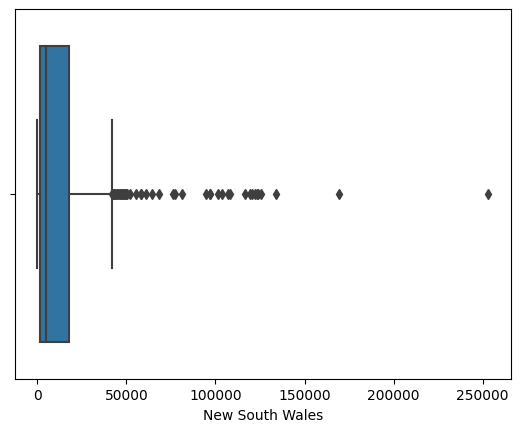

In [39]:
#Detecting outliers in the 'New South Wales' (numeric) column of the income dataset
sns.boxplot(x='New South Wales', data=df_income_details)

In [40]:
#Defining Quartiles Q1: 25% and Q3: 75% for removal of outliers
Q1 = df_income_details['New South Wales'].quantile(0.25) 
Q3 = df_income_details['New South Wales'].quantile(0.75)

#IQR stands for Interquartile Range(IQR), i.e. difference between teh 75th and 25th pecentiles
IQR = Q3 - Q1 
total_outlier_number = ((df_income_details['New South Wales'] < (Q1 - 1.5 * IQR)) | (df_income_details['New South Wales'] > (Q3 + 1.5 * IQR))).sum()

#Displaying IQR
print("Total Number of Outliers in 'New South Wales' attribute of Income Dataset: {}".format(total_outlier_number))

Total Number of Outliers in 'New South Wales' attribute of Income Dataset: 46


In [41]:
#Showing the highest income earner in the New South Wales state
df_income_details[df_income_details['New South Wales'] == df_income_details['New South Wales'].max()]

Type_Value  New South Wales  Victoria  Queensland  South Australia  \
494  C21_4000more_Tot           253161    178012      113308            33441   

     Western Australia  Tasmania  Northern Territory  \
494              72840      7514                4682   

     Australian Capital Territory  Other Territories  total_all_states  \
494                         21685                 52            684695   

     income_bracket  census_year family_status  
494            4000         2021         Other

#### Observation: 
* The above data depicts the highest number of families in 4000 and more income group in 'New South Wales' state. So retaining this data as its essential to identify the income change over the period from 2011 until 2021.

<AxesSubplot:xlabel='total_all_states'>

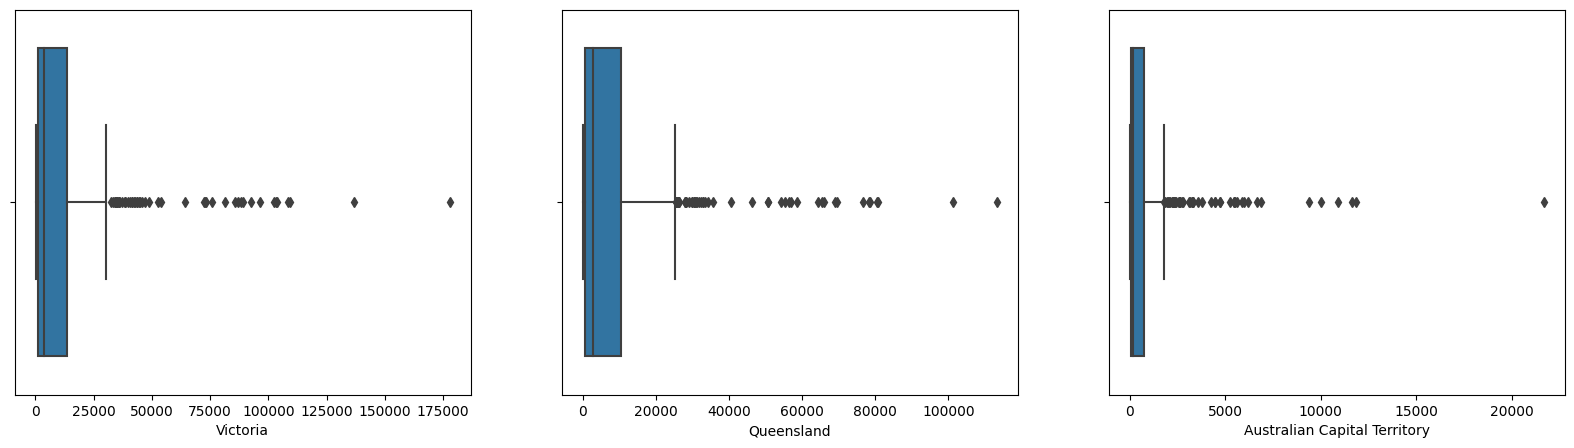

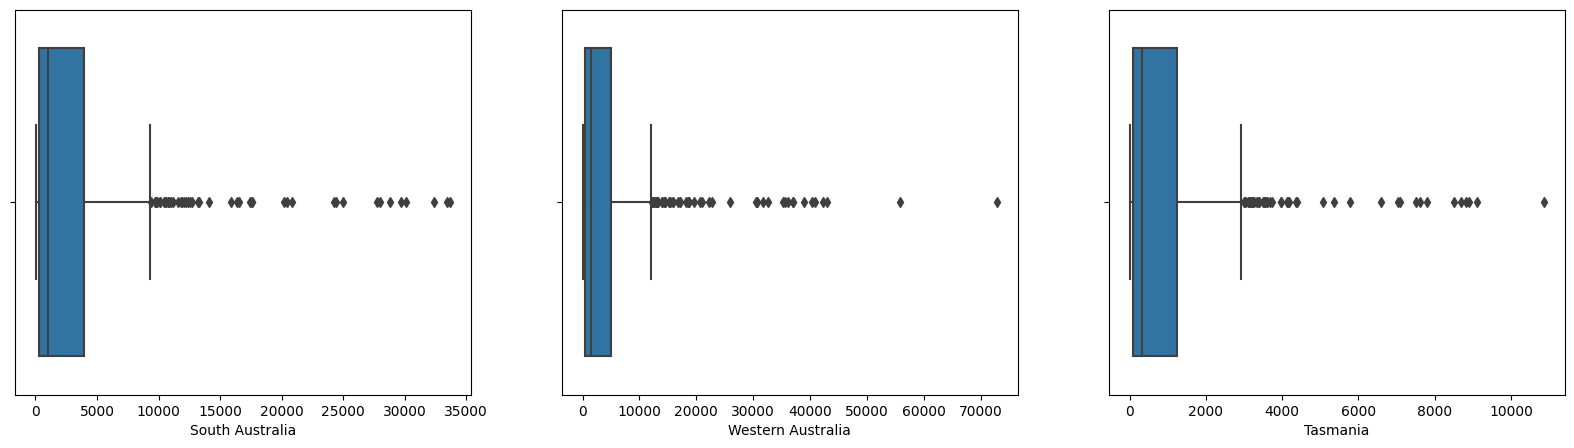

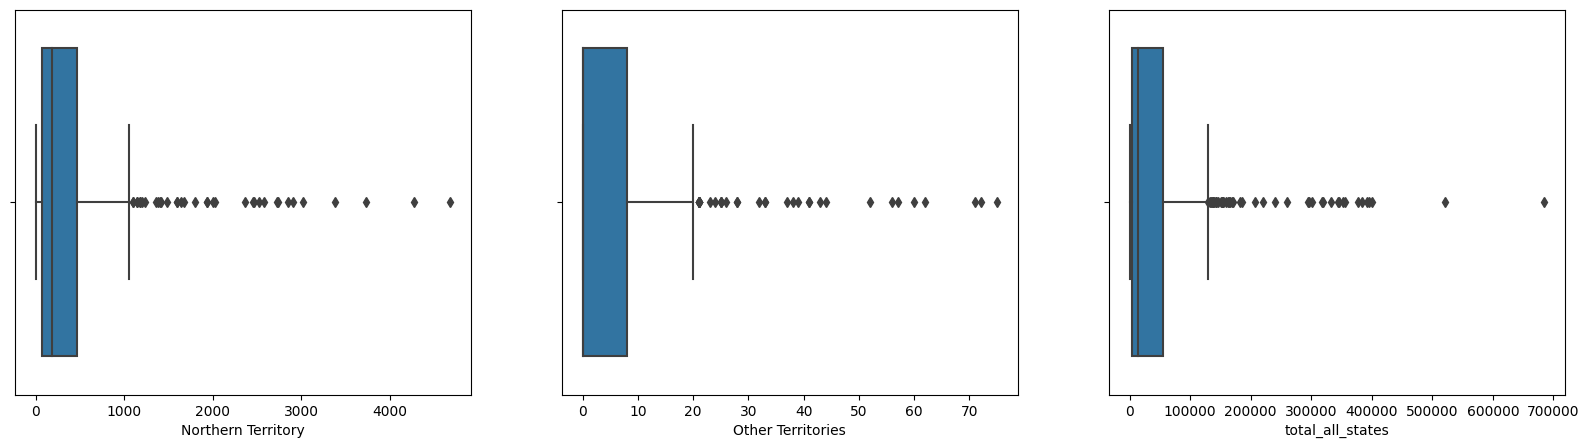

In [42]:
#Detecting outliers in other numeric columns of the income dataset
#Graph settings for display
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharey=False)

#Plot box graphs for 'Victoria', 'Queensland' and 'Australian Capital Territory' attributes
sns.boxplot(x='Victoria', data=df_income_details, ax=axes[0])
sns.boxplot(x='Queensland', data=df_income_details, ax=axes[1])
sns.boxplot(x='Australian Capital Territory', data=df_income_details, ax=axes[2])

#Graph settings for display
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharey=False)

#Plot box graphs for 'South Australia', 'Western Australia' and 'Tasmania' attributes
sns.boxplot(x='South Australia', data=df_income_details, ax=axes[0])
sns.boxplot(x='Western Australia', data=df_income_details, ax=axes[1])
sns.boxplot(x='Tasmania', data=df_income_details, ax=axes[2])

#Graph settings for display
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharey=False)

#Plot box graphs for 'Northern Territory', 'Other Territories' and 'total_all_states' attributes
sns.boxplot(x='Northern Territory', data=df_income_details, ax=axes[0])
sns.boxplot(x='Other Territories', data=df_income_details, ax=axes[1])
sns.boxplot(x='total_all_states', data=df_income_details, ax=axes[2])

#### Observation: 
* As with the above 'New South Wales' attribute, not going to remove the outlier values from these remaining states columns that are informing an elevated number of family earners.

### 7.2 Examining Outliers in **Migration Dataset**

<AxesSubplot:xlabel='Victoria'>

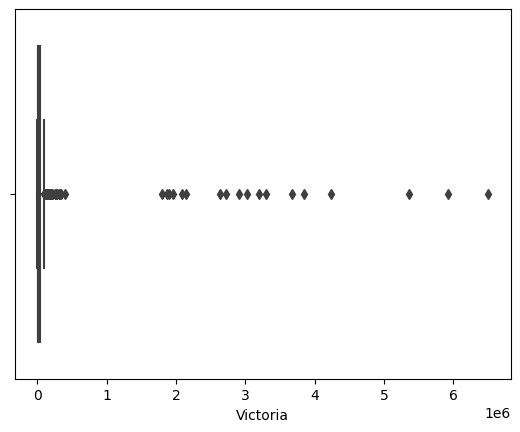

In [43]:
#Detecting outliers in the 'Victoria' (numeric) column of the migration dataset
sns.boxplot(x='Victoria', data=df_migration_details)

In [44]:
#Defining Quartiles Q1: 25% and Q3: 75% for removal of outliers
Q1 = df_migration_details['Victoria'].quantile(0.25) 
Q3 = df_migration_details['Victoria'].quantile(0.75)

#IQR stands for Interquartile Range(IQR), i.e. difference between teh 75th and 25th pecentiles
IQR = Q3 - Q1 
total_outlier_number = ((df_migration_details['Victoria'] < (Q1 - 1.5 * IQR)) | (df_migration_details['Victoria'] > (Q3 + 1.5 * IQR))).sum()

#Displaying IQR
print("Total Number of Outliers in 'Victoria' attribute of Migration Dataset: {}".format(total_outlier_number))

Total Number of Outliers in 'Victoria' attribute of Migration Dataset: 53


In [45]:
#Showing the highest migration in the Victoria state
df_migration_details[df_migration_details['Victoria'] == df_migration_details['Victoria'].max()]

Type_Value  New South Wales  Victoria  Queensland  South Australia  \
341  Tot_C21_P          8072163   6503491     5156138          1781516   

     Western Australia  Tasmania  Northern Territory  \
341            2660026    557571              232605   

     Australian Capital Territory  Other Territories census_year sex country  \
341                        454499               4788        2021   P     Tot   

     total_all_states iso_code  
341          25422797      NaN

#### Observation: 
* The above migration outlier value in Victoria state might be because of several factors such as migrants from around the globe who could have preferred Victoria to relocate for job opportunities, weather conditions etc. So keeping these outlier values.  

<AxesSubplot:xlabel='total_all_states'>

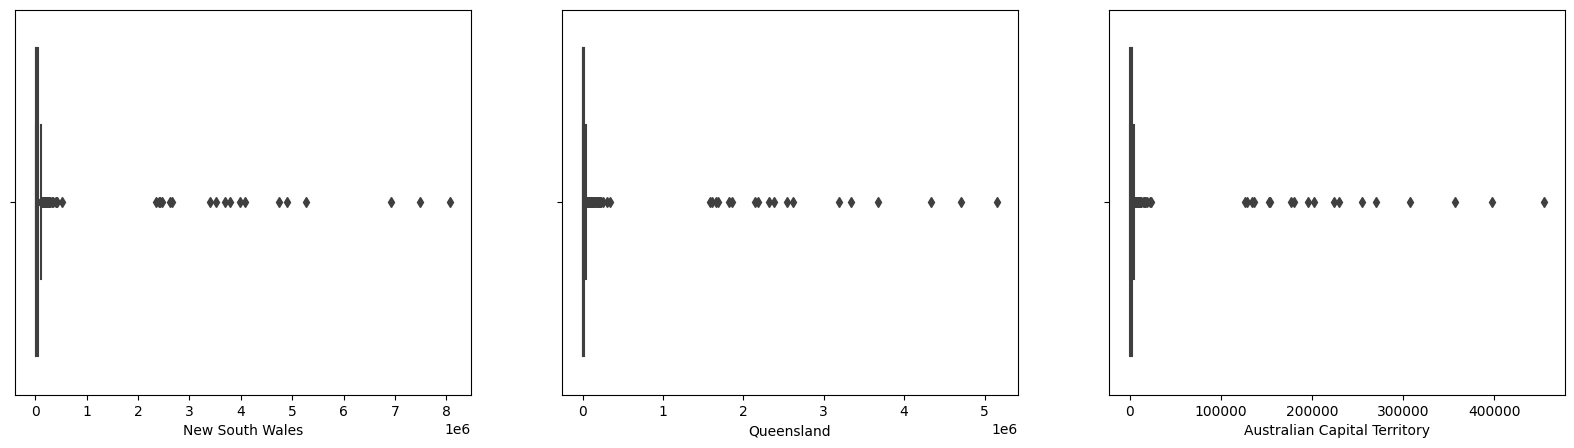

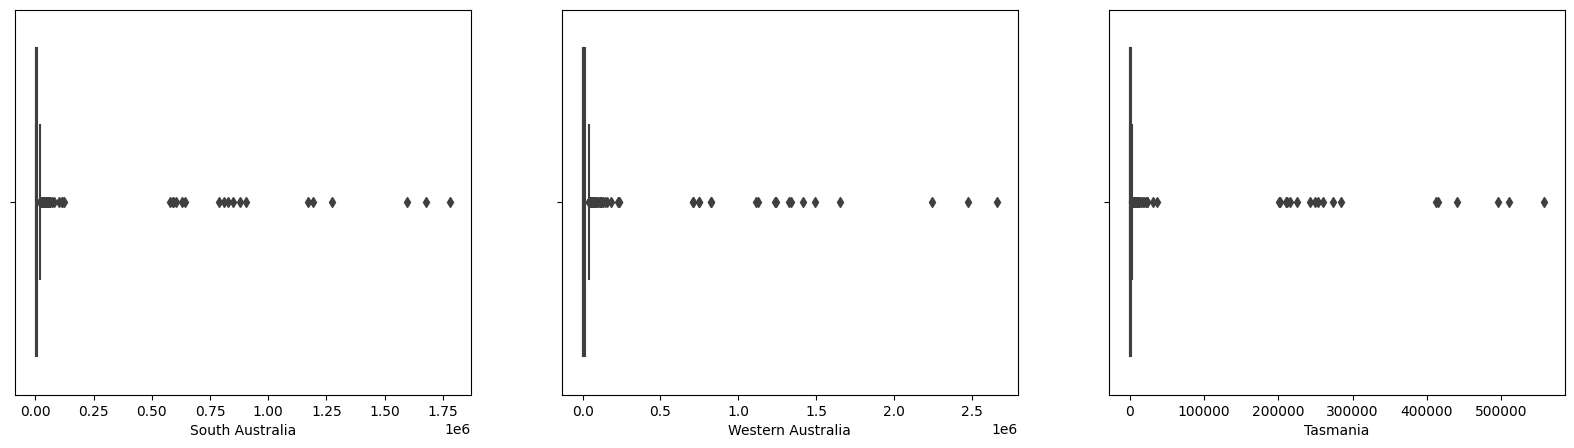

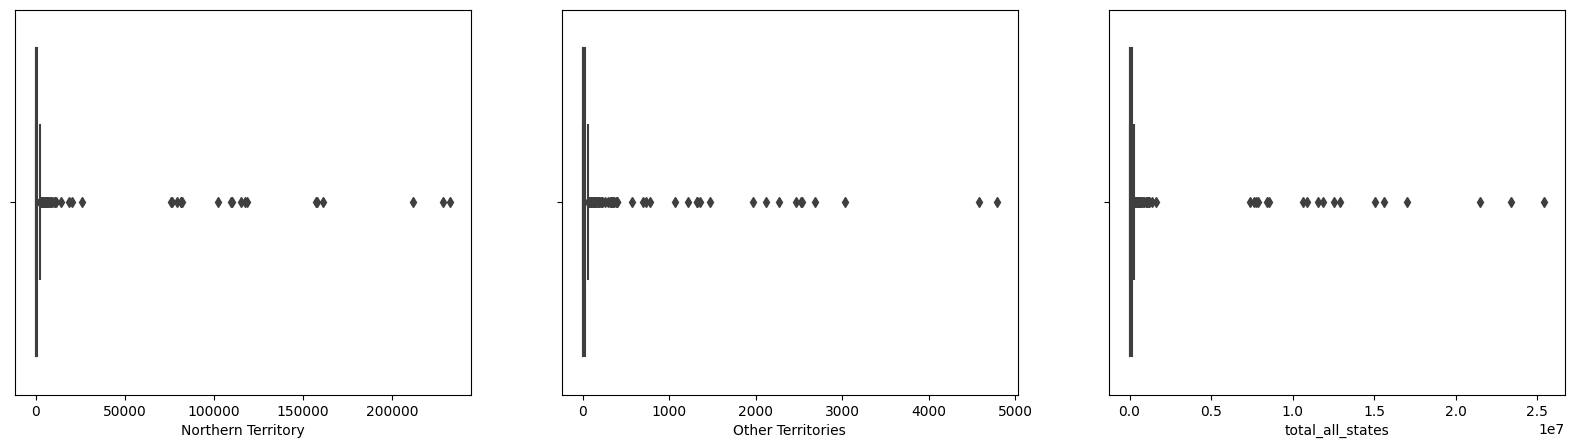

In [46]:
#Detecting outliers in other numeric columns of the migration dataset
#Graph setting for display
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharey=False)

#Plot box graphs for 'New South Wales', 'Queensland' and 'Australian Capital Territory' attributes
sns.boxplot(x='New South Wales', data=df_migration_details, ax=axes[0])
sns.boxplot(x='Queensland', data=df_migration_details, ax=axes[1])
sns.boxplot(x='Australian Capital Territory', data=df_migration_details, ax=axes[2])

#Graph setting for display
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharey=False)

#Plot box graphs for 'South Australia', 'Western Australia' and 'Tasmania' attributes
sns.boxplot(x='South Australia', data=df_migration_details, ax=axes[0])
sns.boxplot(x='Western Australia', data=df_migration_details, ax=axes[1])
sns.boxplot(x='Tasmania', data=df_migration_details, ax=axes[2])

#Graph setting for display
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharey=False)

#Plot box graphs for 'Northern Territory', 'Other Territories' and 'total_all_states' attributes
sns.boxplot(x='Northern Territory', data=df_migration_details, ax=axes[0])
sns.boxplot(x='Other Territories', data=df_migration_details, ax=axes[1])
sns.boxplot(x='total_all_states', data=df_migration_details, ax=axes[2])

#### Observation: 
* Similar to the above Victoria state attribute, maintaining the outlier values from the columns of the remaining state as it shows a rise in migrants.  

## 8. Data Visualization using Various Plots

### 8.1 Visualizing **Income Dataset**

<AxesSubplot:xlabel='income_bracket', ylabel='count'>

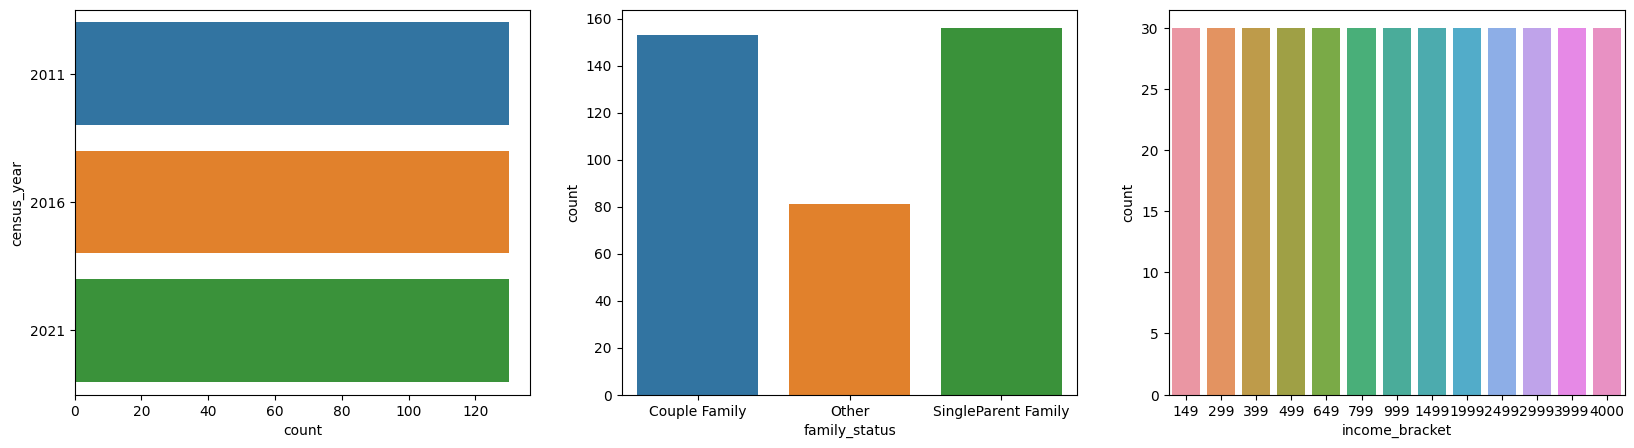

In [47]:
#Checking the distribution(number of values/count of datapoints) of attributes: census_year, family_status and income_bracket in the income dataset with bra graph
#Setting graph for diaplay
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharey=False)

sns.countplot(y='census_year',data=df_income_details,ax=axes[0])
sns.countplot(x='family_status',data=df_income_details,ax=axes[1])
sns.countplot(x='income_bracket',data=df_income_details,ax=axes[2])


#### Observations: 
* The number of values for the 2011, 2016 and 2021 census years is evenly distributed, with 170 data points in each.

* The number of wage earners of Single Parent families’ is slightly higher than couple families. 

* The count of income data points in every income bracket is identical, with 30 values in each.

In [48]:
#Checking the distribution of values in different salary brackets within different states of Australia
fig = go.Figure()

fig.add_trace(go.Box(
    x=df_income_details["income_bracket"],
    y=df_income_details["New South Wales"],
    name='NSW'
))

fig.add_trace(go.Box(
    x=df_income_details["income_bracket"],
    y=df_income_details["Victoria"],
    name='VIC'
))

fig.add_trace(go.Box(
    x=df_income_details["income_bracket"],
    y=df_income_details["Queensland"],
    name='QLD'
))

fig.add_trace(go.Box(
    x=df_income_details["income_bracket"],
    y=df_income_details["South Australia"],
    name='SA'
))

fig.add_trace(go.Box(
    x=df_income_details["income_bracket"],
    y=df_income_details["Western Australia"],
    name='WA'
))

fig.add_trace(go.Box(
    x=df_income_details["income_bracket"],
    y=df_income_details["Australian Capital Territory"],
    name='ACT'
))

fig.add_trace(go.Box(
    x=df_income_details["income_bracket"],
    y=df_income_details["Tasmania"],
    name='TAS'
))

fig.add_trace(go.Box(
    x=df_income_details["income_bracket"],
    y=df_income_details["Northern Territory"],
    name='NT'
))

fig.update_layout(yaxis_range=[0,140000])
fig.update_layout(width=1500, height=1000)
fig.update_layout(
    yaxis_title='normalized moisture',
    boxmode='group' #Grouping together boxes of the different traces for each value of x i.e. income_bracket
)

fig.update_xaxes(type='category')
fig.show()

#### Observations:
* The number of families’ income for various salary brackets within different states is inequitably distributed. 

* In almost all salary groups, NSW, Victoria and Queensland have highest number of earners. 

In [49]:
#Creating an aggregated dataset for further analysis and visualization
df_income_aggregated = df_income_details.groupby(['census_year','income_bracket','family_status']).sum().reset_index()

#Removing rows with the value "Other" from the Family Status column as this value is a sum of "Couple Family" and "SingleParent Family" values
df_income_aggregated = df_income_aggregated[df_income_aggregated['family_status'] != 'Other']

#Displaying the aggregated income dataset
df_income_aggregated.head()

census_year  income_bracket        family_status  New South Wales  \
0         2011             149        Couple Family             1849   
2         2011             149  SingleParent Family             3985   
3         2011             299        Couple Family             5471   
5         2011             299  SingleParent Family            12230   
6         2011             399        Couple Family             4320   

   Victoria  Queensland  South Australia  Western Australia  Tasmania  \
0      1468         892              373                502        84   
2      3001        2255              874               1229       226   
3      4401        2604             1082               1185       294   
5      8879        6762             2823               3306      1014   
6      3261        1877              752                879       251   

   Northern Territory  Australian Capital Territory  Other Territories  \
0                  64                            51                  0   
2                 355                           115                  0   
3                 534                           108                  0   
5                 720                           416                  0   
6                 250                            90                  0   

   total_all_states  
0              5283  
2             12040  
3             15679  
5             36150  
6             11680

In [50]:
#Calculating and adding new column Percentage of total_all_states group by census_year and income_bracket
#i.e. Ratio of income by family_status in a census year within a income bracket(whats the ratio between single and couple family income by using the aggregated dataset)
df_income_aggregated['percentage'] = 100 * df_income_aggregated['total_all_states'] / df_income_aggregated.groupby(['census_year','income_bracket'])['total_all_states'].transform('sum')
df_income_aggregated.head()

census_year  income_bracket        family_status  New South Wales  \
0         2011             149        Couple Family             1849   
2         2011             149  SingleParent Family             3985   
3         2011             299        Couple Family             5471   
5         2011             299  SingleParent Family            12230   
6         2011             399        Couple Family             4320   

   Victoria  Queensland  South Australia  Western Australia  Tasmania  \
0      1468         892              373                502        84   
2      3001        2255              874               1229       226   
3      4401        2604             1082               1185       294   
5      8879        6762             2823               3306      1014   
6      3261        1877              752                879       251   

   Northern Territory  Australian Capital Territory  Other Territories  \
0                  64                            51                  0   
2                 355                           115                  0   
3                 534                           108                  0   
5                 720                           416                  0   
6                 250                            90                  0   

   total_all_states  percentage  
0              5283      30.497  
2             12040      69.503  
3             15679      30.251  
5             36150      69.749  
6             11680      16.733

#### Observation:
* From the above-aggregated income dataset result, the first two rows inform that, for the 2011 census in the 0-149 income bracket, 30.49% of wage earners are from Couple families and the rest 69.50% from Single Parent families (the last percentage column). 

<AxesSubplot:xlabel='income_bracket', ylabel='Victoria'>

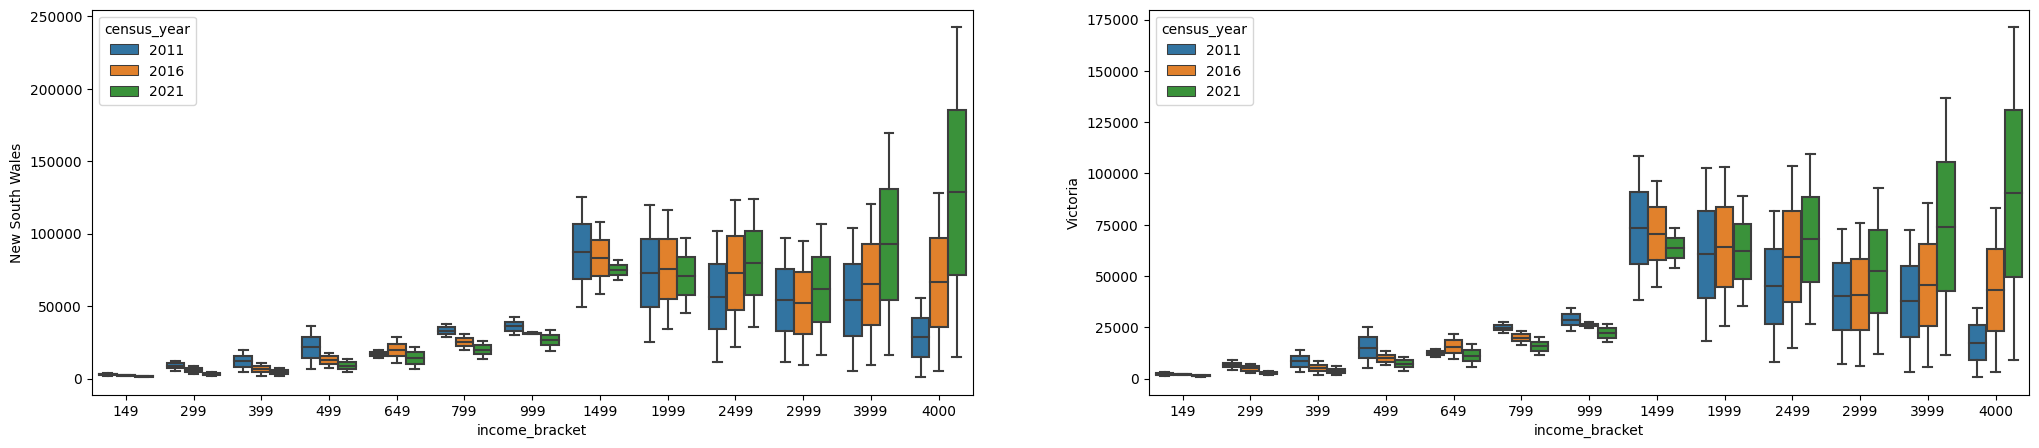

In [51]:
#Distribution of income in the NSW and Victoria for 3 census in various income brackets
#Graph setting for diplay
fig, axes = plt.subplots(1, 2, figsize=(25,5), sharey=False)

sns.boxplot(data=df_income_aggregated,x='income_bracket',y='New South Wales',hue='census_year',ax=axes[0])
sns.boxplot(data=df_income_aggregated,x='income_bracket',y='Victoria',hue='census_year',ax=axes[1])

#### Observations:
* From the above NSW and Victoria income distribution graph, the number of families receiving salaries in the 4000 brackets (i.e. 3999 - 4000) is significantly higher than in Victoria. For instance, in the census year 2021, there are 250 thousand jobholders from NSW in the 4000 income bracket whereas, from Victoria, there are 175 thousand in the same bracket.

* In the span of 3 censuses from 2011 until 2021, total salaried workers in the 3999 and 4000 wage groups have sharply increased in both states. However, for the 1499 income group, it plummeted and a slight decline for the 1999 income group.

<AxesSubplot:xlabel='income_bracket', ylabel='Other Territories'>

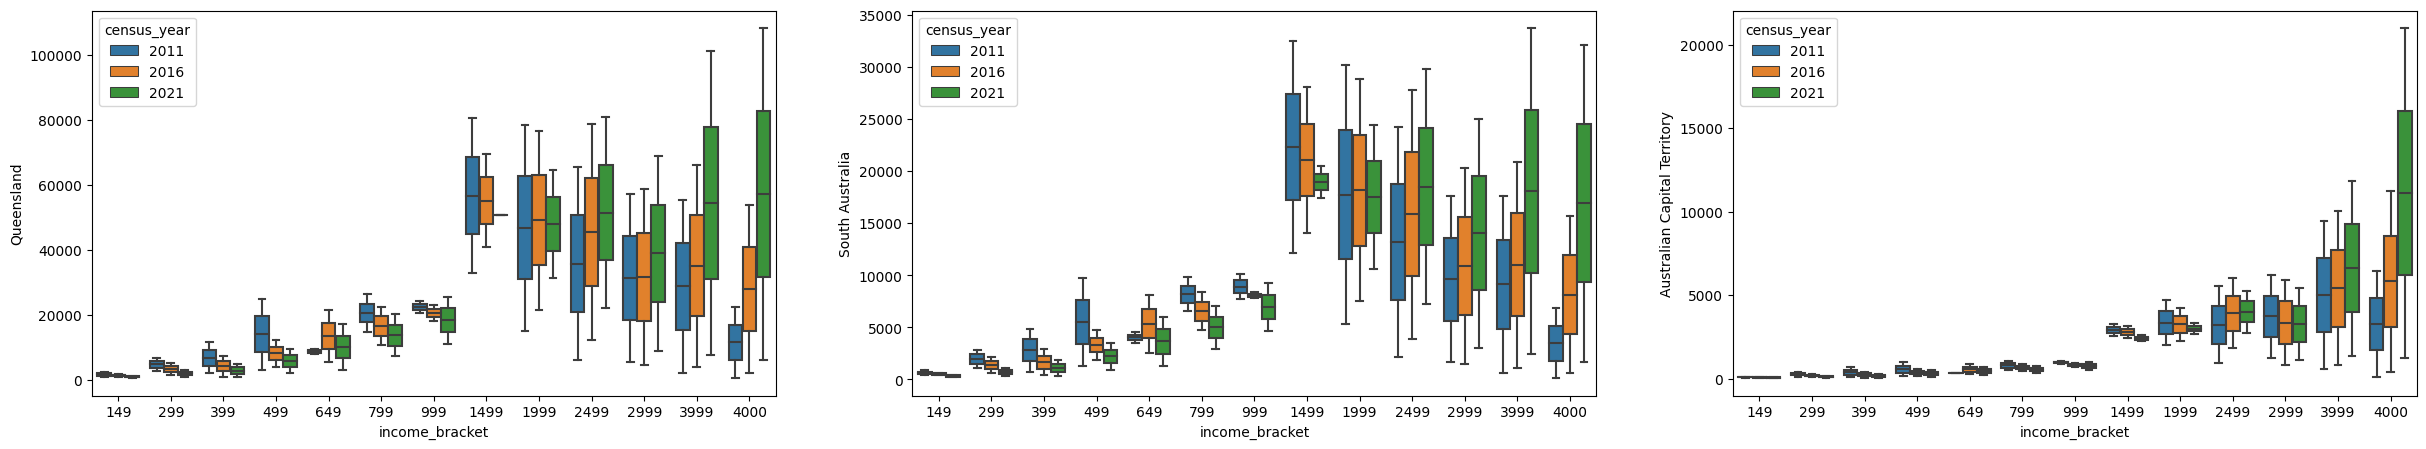

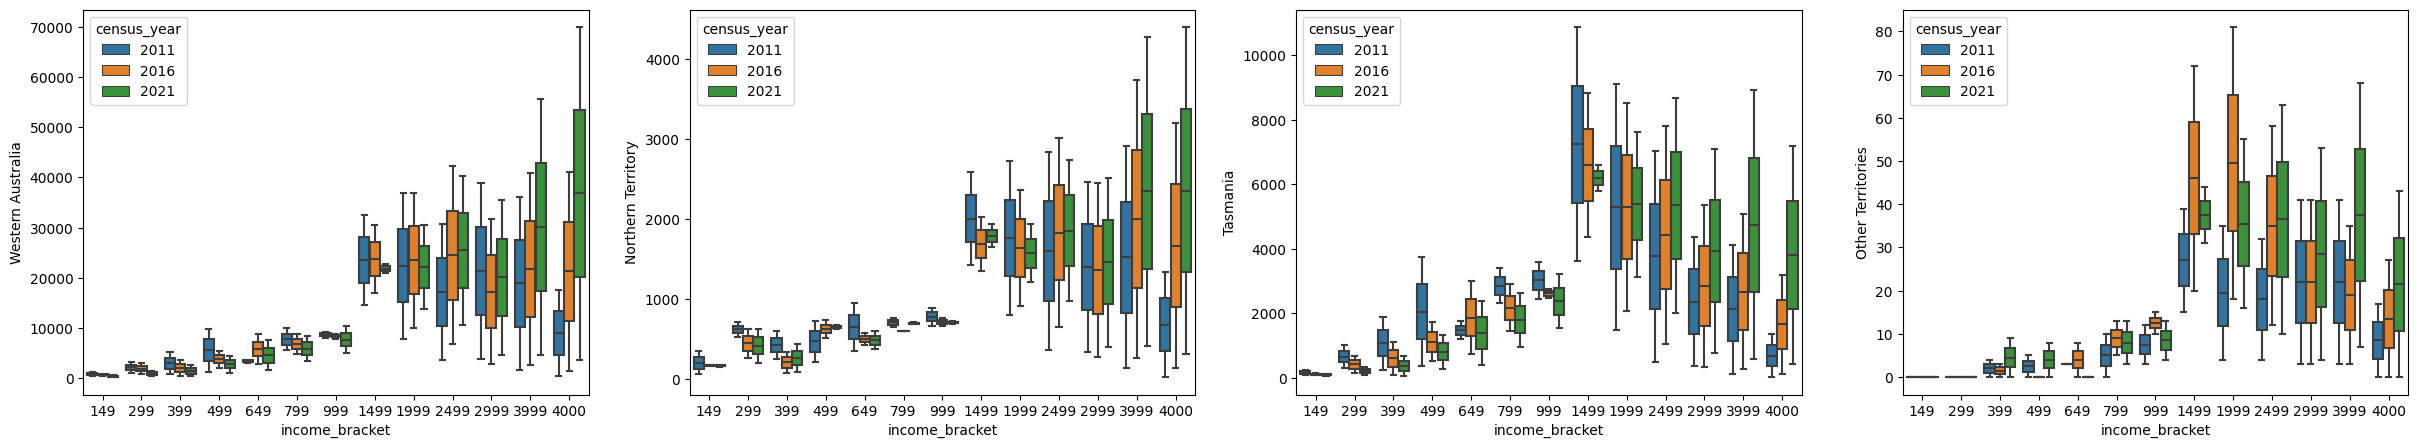

In [52]:
#Distribution of income in remaining States: Queensland, South Australia, Australian Capital Territory, Western Australia, Northern Territory, Tasmania and Other Territories

#Graphs setting for display
fig, axes = plt.subplots(1, 3, figsize=(30,5), sharey=False )

sns.boxplot(data=df_income_aggregated,x='income_bracket',y='Queensland',hue='census_year',ax=axes[0])
sns.boxplot(data=df_income_aggregated,x='income_bracket',y='South Australia',hue='census_year',ax=axes[1])
sns.boxplot(data=df_income_aggregated,x='income_bracket',y='Australian Capital Territory',hue='census_year',ax=axes[2])

#Graphs setting for display
fig, axes = plt.subplots(1, 4, figsize=(30,5), sharey=False )

sns.boxplot(data=df_income_aggregated,x='income_bracket',y='Western Australia',hue='census_year',ax=axes[0])
sns.boxplot(data=df_income_aggregated,x='income_bracket',y='Northern Territory',hue='census_year',ax=axes[1])
sns.boxplot(data=df_income_aggregated,x='income_bracket',y='Tasmania',hue='census_year',ax=axes[2])
sns.boxplot(data=df_income_aggregated,x='income_bracket',y='Other Territories',hue='census_year',ax=axes[3])

#### Obeservations:
* The highest number of salaried workers in rank order are from NSW, Victoria and Queensland for all the 3 consecutive censuses. 

* Up until 2021, there are significantly fewer income producers (4000) in Northern Territory in comparison to all other known states in Australia.  

In [53]:
#Using the last two columns total_all_states and percentage (12:13) of the aggregated dataset 
from numpy import tile

#Extracting two columns total_all_states and percentage
columns = df_income_aggregated.columns[12:13]

#Plot setup
plot = make_subplots(rows=1, cols=1)

#Adding bars for different income_brackets (which is total for all states) for the 3 cennsuses
for cols in columns:
    plot.add_trace(go.Bar(x=[df_income_aggregated['income_bracket'],df_income_aggregated['census_year']],
                             y = df_income_aggregated['total_all_states'],
                             name = cols,
                             legendgroup = cols,
                             showlegend = True, text=df_income_aggregated['percentage'].apply(lambda x: '{0:1.2f}'.format(x))
                            ), row = 1, col = 1)
plot.show()


#### Observations:
* The growth in number of families earning more than 4000 salaries has increased significantly over the census period from 2011 to 2021 while showing the best performance among salary groups.

In [54]:
#Finding the ratio of income within Family Status for each income bracket for every census
plot = px.bar(df_income_aggregated, x="income_bracket", y="total_all_states",  facet_col='census_year',text=df_income_aggregated['percentage'].apply(lambda x: '{0:1.2f}'.format(x)),color='family_status')
plot.update_xaxes(showline=True, linewidth=2, linecolor='black')
plot.update_yaxes(showline=True, linewidth=2, linecolor='black')
plot.update_xaxes(type='category')
plot.show()

#### Observations:
* For the first two censuses 2011 and 2016, the number of families' earnings in various income groups was similar with slight variation. Whereas, in 2021 majority of the families' income earners are from higher income brackets. 

* Over the period of 3 censuses, even though the number of families' income has increased moderately, the ratio of single-parent families' income throughout the salary brackets has improved compared to couple families.

In [55]:
#Using aggregated data, all families income composition for different income bracket during 3 censuses
fig = px.pie(df_income_aggregated, values='total_all_states',facet_col='census_year',names='income_bracket',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

#### Observation: 
* In 2011 and 2016, the top two salary brackets were 1499 and 1999, however, in 2021 it jumped and shifted to 4000(and more) and 3999 income brackets.

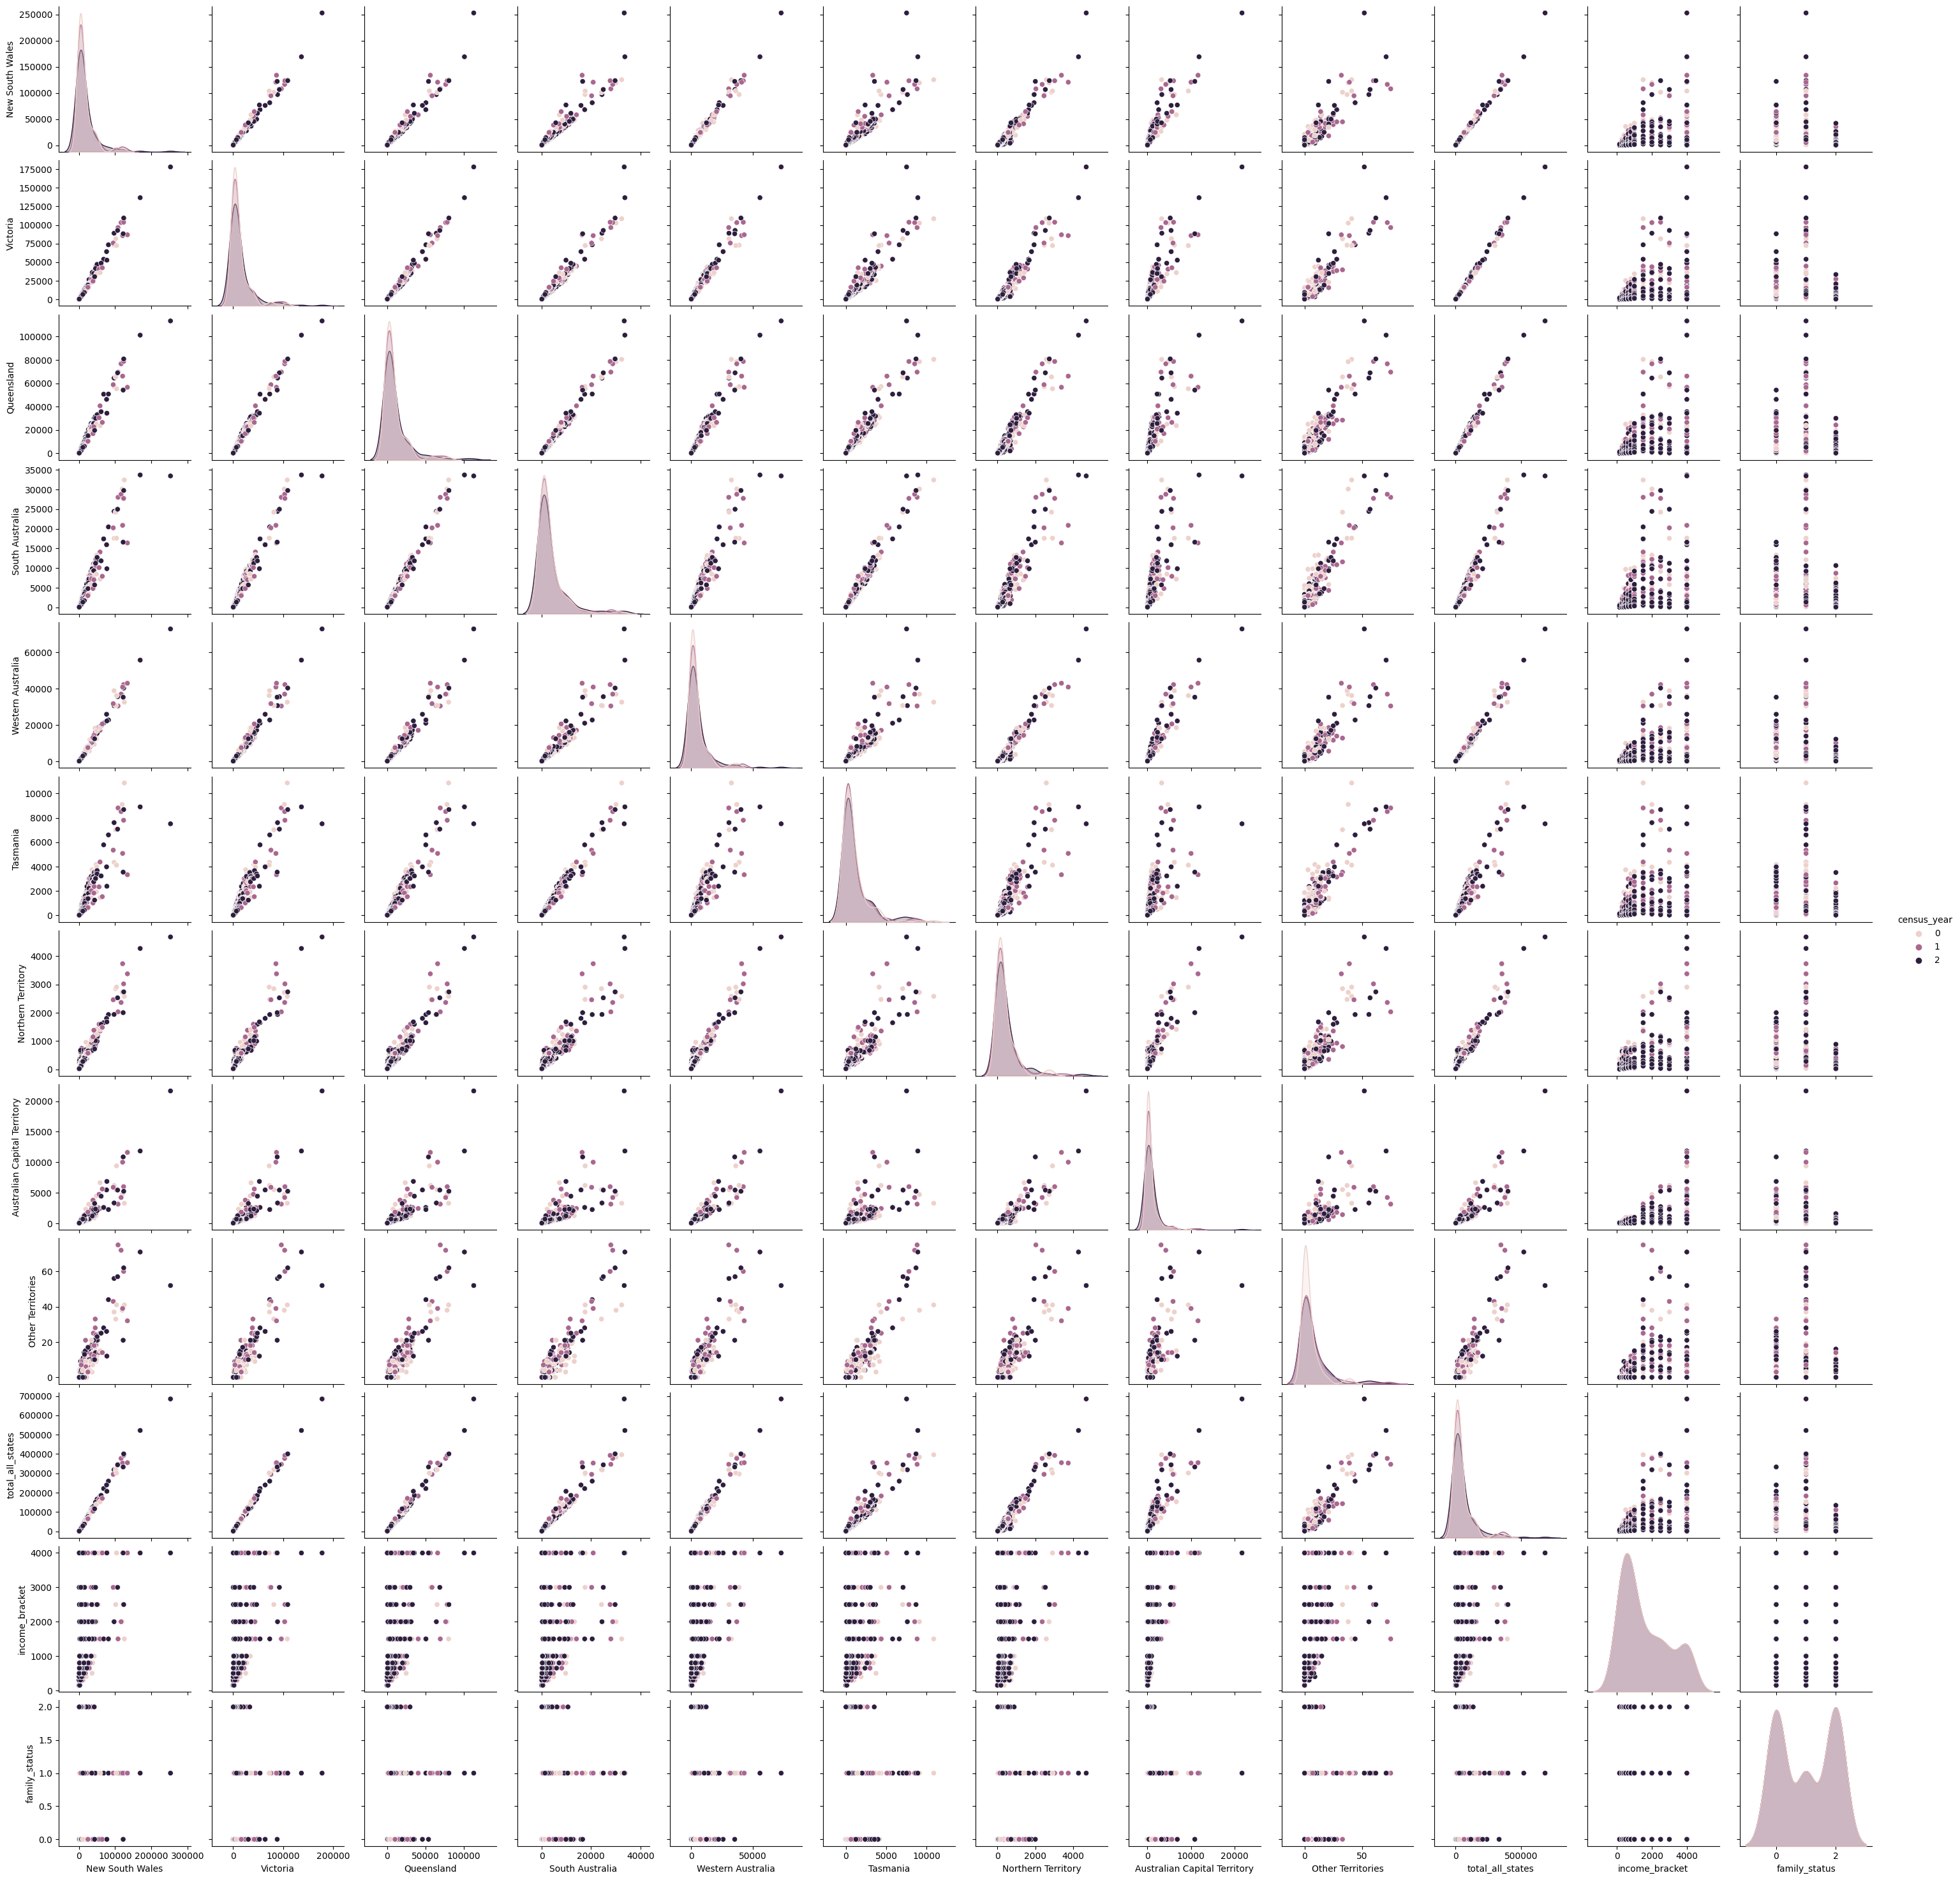

In [56]:
#Pairplot for the income dataset
#Converting categorical data into respective category codings for the Pairplot
for x in ['family_status', 'census_year']:
    df_income_details[x] = df_income_details[x].astype('category')

#Selecting all category columns
cat_columns = df_income_details.select_dtypes(['category']).columns 
#Replacing the existing columns with category
df_income_details[cat_columns] = df_income_details[cat_columns].apply(lambda x: x.cat.codes) 
sns.pairplot(df_income_details, hue='census_year')


<AxesSubplot:>

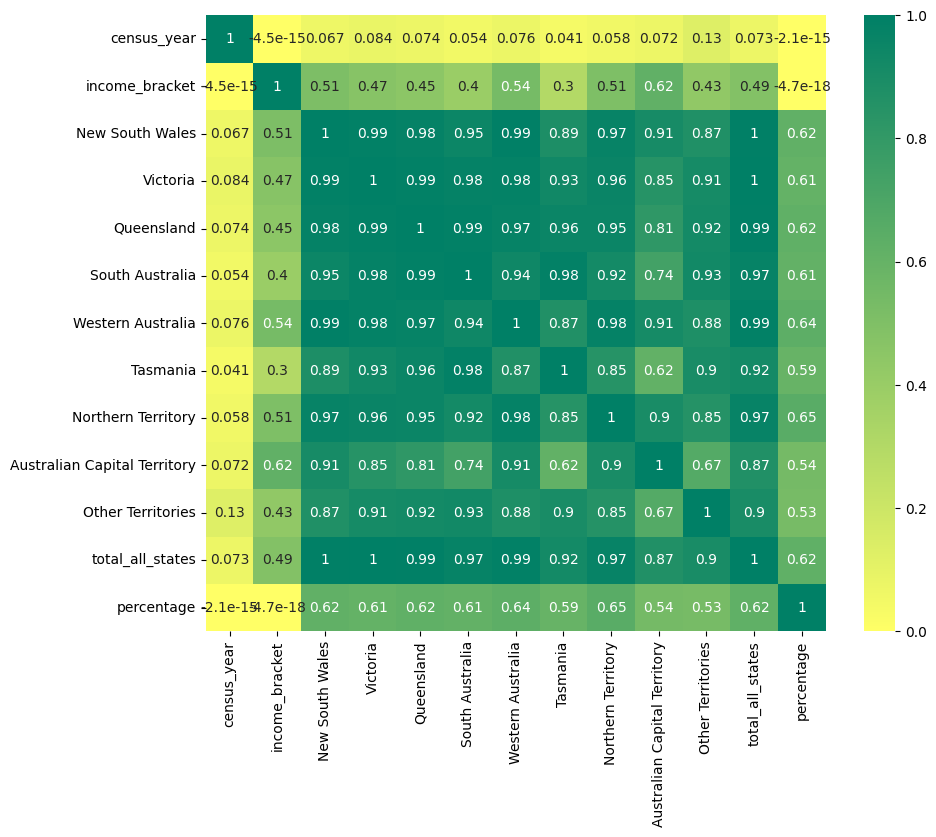

In [57]:
#Plotting Heatmap for Correlation between different attributes of the income dataset
corr = df_income_aggregated.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap = 'summer_r')
#Higher the value more correlated the two variables


Note: The dataset used from the ASB data packs is the aggregated data which is deidentified for privacy concerns so it’s difficult to identify the efficient insights from the above Pair and Heatmaps for the income dataset.

### 8.2 Visualizing **Migration Dataset**

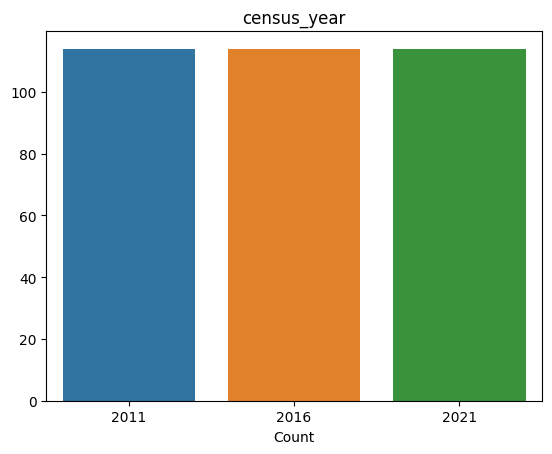

In [58]:
#Creating a bar plot to visualize the count of attribute census_year from migration dataset
sns.barplot(x=df_migration_details['census_year'].value_counts().index,y=df_migration_details['census_year'].value_counts().values)
plt.title('census_year')
plt.xlabel('Count')
plt.show()

#### Observation:
* The data is uniformly scatter through census years. 

<AxesSubplot:xlabel='census_year', ylabel='total_all_states'>

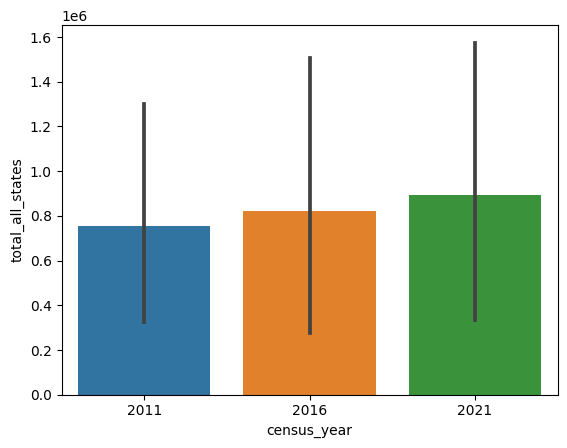

In [59]:
#Plotting the average number of migrations for three censuses 2011, 2016 and 2021 from migration dataset
sns.barplot(x = "census_year", y = "total_all_states", data = df_migration_details)

#### Observation:
* For the period of three censuses from 2011 to 2021, the average number of migrants to Australia has considerably increased.

In [60]:
#Generating aggregated dataset based on only total persons which is the sum of F and M gender, excluding Australia as people's birth country and some other rows with birth country not specified/given
df_people_migration_details = df_migration_details[ (df_migration_details['sex']=='P') & (df_migration_details['country']!='Australia')  & (df_migration_details['country']!='Tot') & (df_migration_details['country']!='Country birt ns')]
df_people_migration_details.head()

Type_Value  New South Wales  Victoria  Queensland  South Australia  \
2   Afghanistan_C11_P             8949      9947        1805             3288   
5   Afghanistan_C16_P            13029     18117        3381             6313   
8   Afghanistan_C21_P            14623     25432        4733             8214   
20   Bangladesh_C11_P            17009      5118        1670             1284   
23   Bangladesh_C16_P            24218      7830        2766             1967   

    Western Australia  Tasmania  Northern Territory  \
2                3927        45                 187   
5                5114       305                  61   
8                5724       290                  37   
20               1492        54                 169   
23               2583       106                 398   

    Australian Capital Territory  Other Territories census_year sex  \
2                            344                116        2011   P   
5                            472                  3        2016   P   
8                            745                  4        2021   P   
20                          1014                  3        2011   P   
23                          1366                  5        2016   P   

        country  total_all_states iso_code  
2   Afghanistan             28608      AFG  
5   Afghanistan             46795      AFG  
8   Afghanistan             59802      AFG  
20   Bangladesh             27813      BGD  
23   Bangladesh             41239      BGD

<AxesSubplot:xlabel='Victoria', ylabel='census_year'>

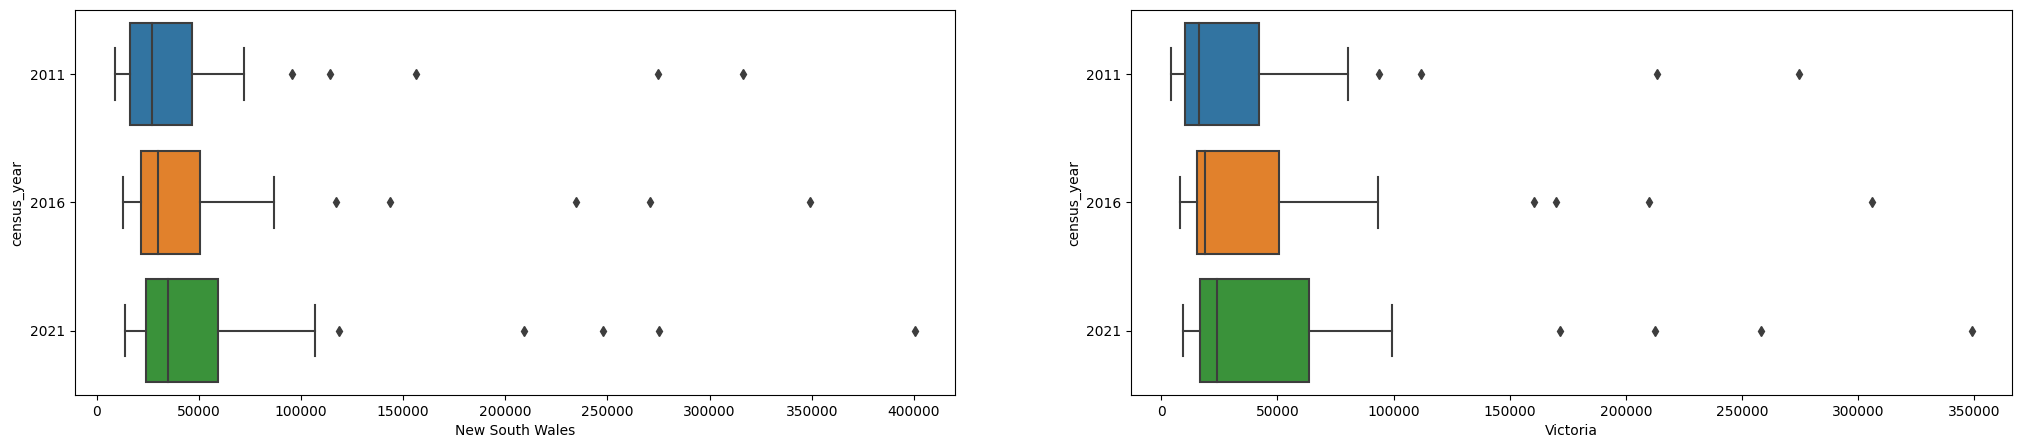

In [61]:
#Distribution of the number of immigrants in the NSW and Victoria for 3 censuses 2011, 2016 and 2021
#Graph setting for display
fig, axes = plt.subplots(1, 2, figsize=(25,5), sharey=False)

sns.boxplot(data=df_people_migration_details,x='New South Wales',y='census_year', ax=axes[0])
sns.boxplot(data=df_people_migration_details,x='Victoria',y='census_year', ax=axes[1])

#### Observation:
* The number of heightened (extreme figures) immigrants has steadily grown from the period of 2011 until 2021 for NSW and Victoria with a slight difference of scale between these states.

<AxesSubplot:xlabel='Tasmania', ylabel='census_year'>

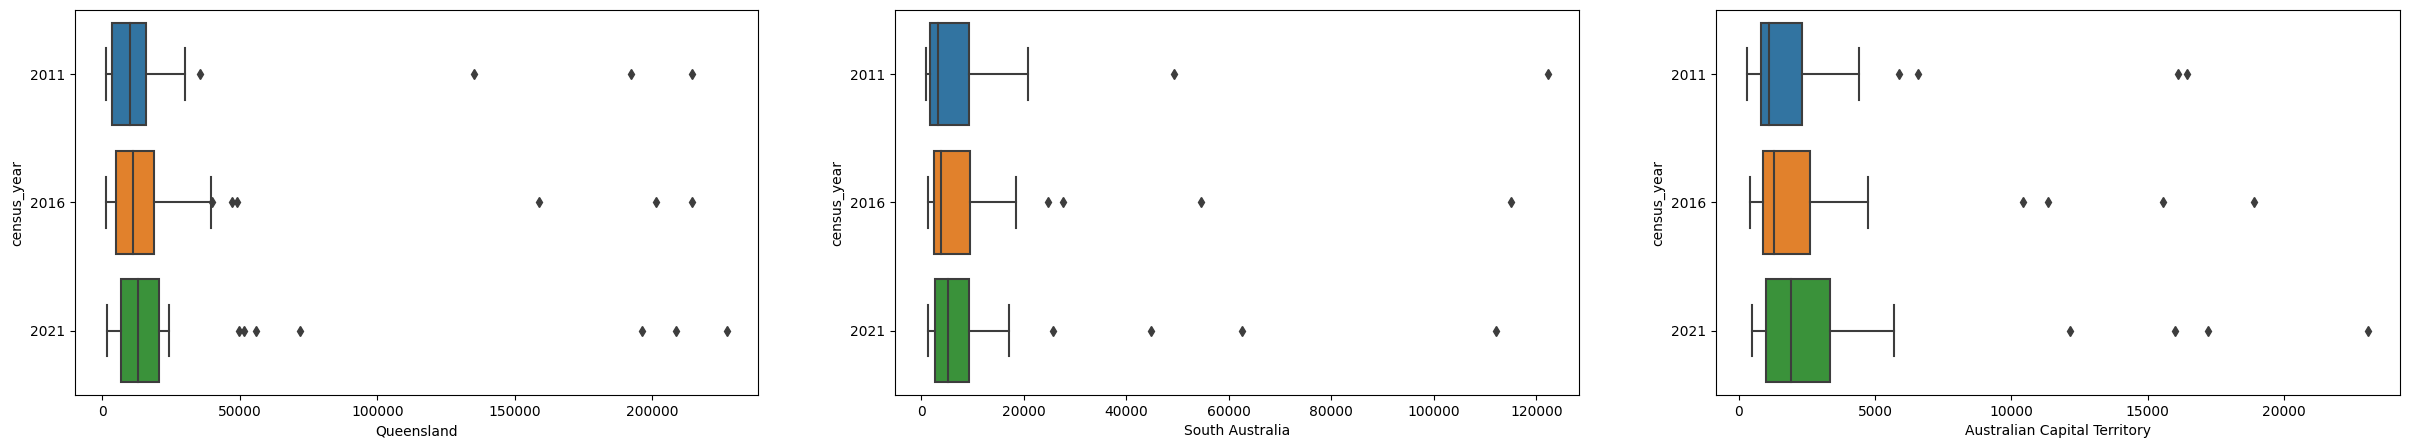

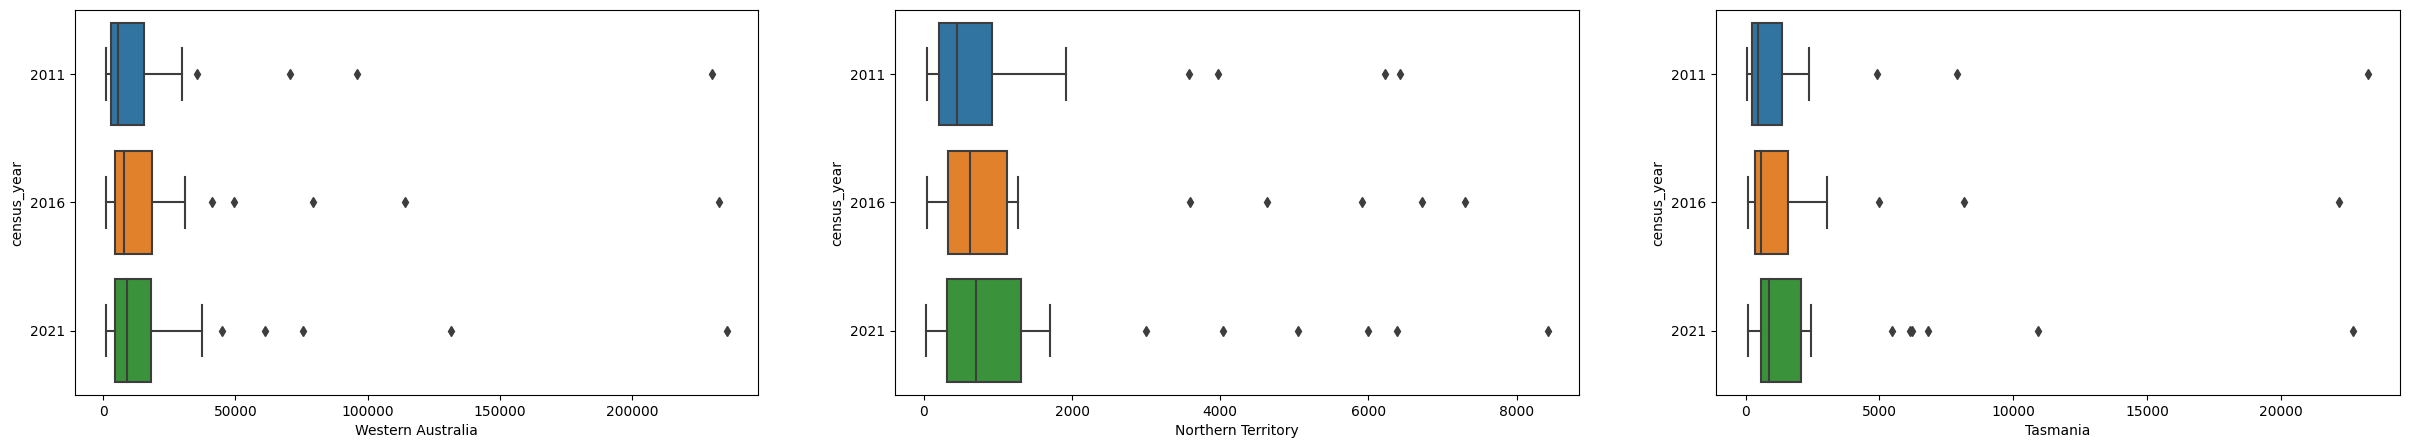

In [62]:
#Distribution of immigrants in remaining States: Queensland, South Australia, Australian Capital Territory, Western Australia, Northern Territory and Tasmania
# Setting graph for display
fig, axes = plt.subplots(1, 3, figsize=(30,5), sharey=False )

sns.boxplot(data=df_people_migration_details,x='Queensland',y='census_year', ax=axes[0])
sns.boxplot(data=df_people_migration_details,x='South Australia',y='census_year', ax=axes[1])
sns.boxplot(data=df_people_migration_details,x='Australian Capital Territory',y='census_year', ax=axes[2])

# Setting graph for display
fig, axes = plt.subplots(1, 3, figsize=(30,5), sharey=False )

sns.boxplot(data=df_people_migration_details,x='Western Australia',y='census_year', ax=axes[0])
sns.boxplot(data=df_people_migration_details,x='Northern Territory',y='census_year', ax=axes[1])
sns.boxplot(data=df_people_migration_details,x='Tasmania',y='census_year', ax=axes[2])

#### Observations:
* The scale of migrants to Queensland, South Australia and Western Australia is significantly high as compared to ACT, Northern Territory and Tasmania.

* The migration to South Australia from 2011 until 2021 has slightly dropped. Whereas, migration to the remaining states has fairly increased, except for Tasmania with light fluctuation for the same period.  

In [63]:
#Checking migration from around the globe
plot = px.bar(df_people_migration_details,x='country',y='total_all_states',facet_col='census_year',text='total_all_states',color='census_year',width=1800, height=800)
plot.show()

#### Observations: 
* The largest number of total migrated people are from the United Kingdom, China, India, New Zealand, Vietnam and the Philippines compared to the rest of the countries around the globe.

* Overall, the total number of people from the United Kingdom who migrated to Australia is higher than from other countries. 

In [74]:
df_people_migration_details.head()

Type_Value  New South Wales  Victoria  Queensland  South Australia  \
2   Afghanistan_C11_P             8949      9947        1805             3288   
5   Afghanistan_C16_P            13029     18117        3381             6313   
8   Afghanistan_C21_P            14623     25432        4733             8214   
20   Bangladesh_C11_P            17009      5118        1670             1284   
23   Bangladesh_C16_P            24218      7830        2766             1967   

    Western Australia  Tasmania  Northern Territory  \
2                3927        45                 187   
5                5114       305                  61   
8                5724       290                  37   
20               1492        54                 169   
23               2583       106                 398   

    Australian Capital Territory  Other Territories census_year sex  \
2                            344                116        2011   P   
5                            472                  3        2016   P   
8                            745                  4        2021   P   
20                          1014                  3        2011   P   
23                          1366                  5        2016   P   

        country  total_all_states iso_code      diff  
2   Afghanistan             28608      AFG       NaN  
5   Afghanistan             46795      AFG 18187.000  
8   Afghanistan             59802      AFG 13007.000  
20   Bangladesh             27813      BGD       NaN  
23   Bangladesh             41239      BGD 13426.000

In [75]:
#Evaluating the difference
df_people_migration_details['diff'] = df_people_migration_details.groupby(['country'])['total_all_states'].diff(1)
#df_people_migration_details.to_excel(r'/Users/monali_patil/Monali/MDSI-Semester1/Data Science Using Python/Assignment/ABS-Analysis/ABS_Migration_Dataset.xls', index=False)
df_people_migration_details.to_csv(r'/Users/monali_patil/Monali/MDSI-Semester1/Data Science Using Python/Assignment/ABS-Analysis/ABS_Migration_Dataset.csv', index=False)
df_people_migration_details.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.



ModuleNotFoundError: No module named 'xlwt'

In [66]:
#Checking if any variation in migration from various countries (i.e actual difference in migration figures)
plot = px.bar(df_people_migration_details,x='diff',y='country',color='census_year',width=2000, height=800,text=df_people_migration_details['diff'].astype(str) + ' - ' + df_people_migration_details['country']) ## df_people_migration_details['diff'] + ' ' + df_people_migration_details['country'])
plot.show()

#### Obeservations:
* This graph illustrates the net immigration of people from various countries between 2011 to 2021. Considering 2011 as a basis for the number of people born overseas, the top countries from where the highest number of people migrated to Australia are China in 2016 and India in 2021.  

* During the period of 3 censuses, the number of people migrating from Italy, Greece and Germany reduced. 

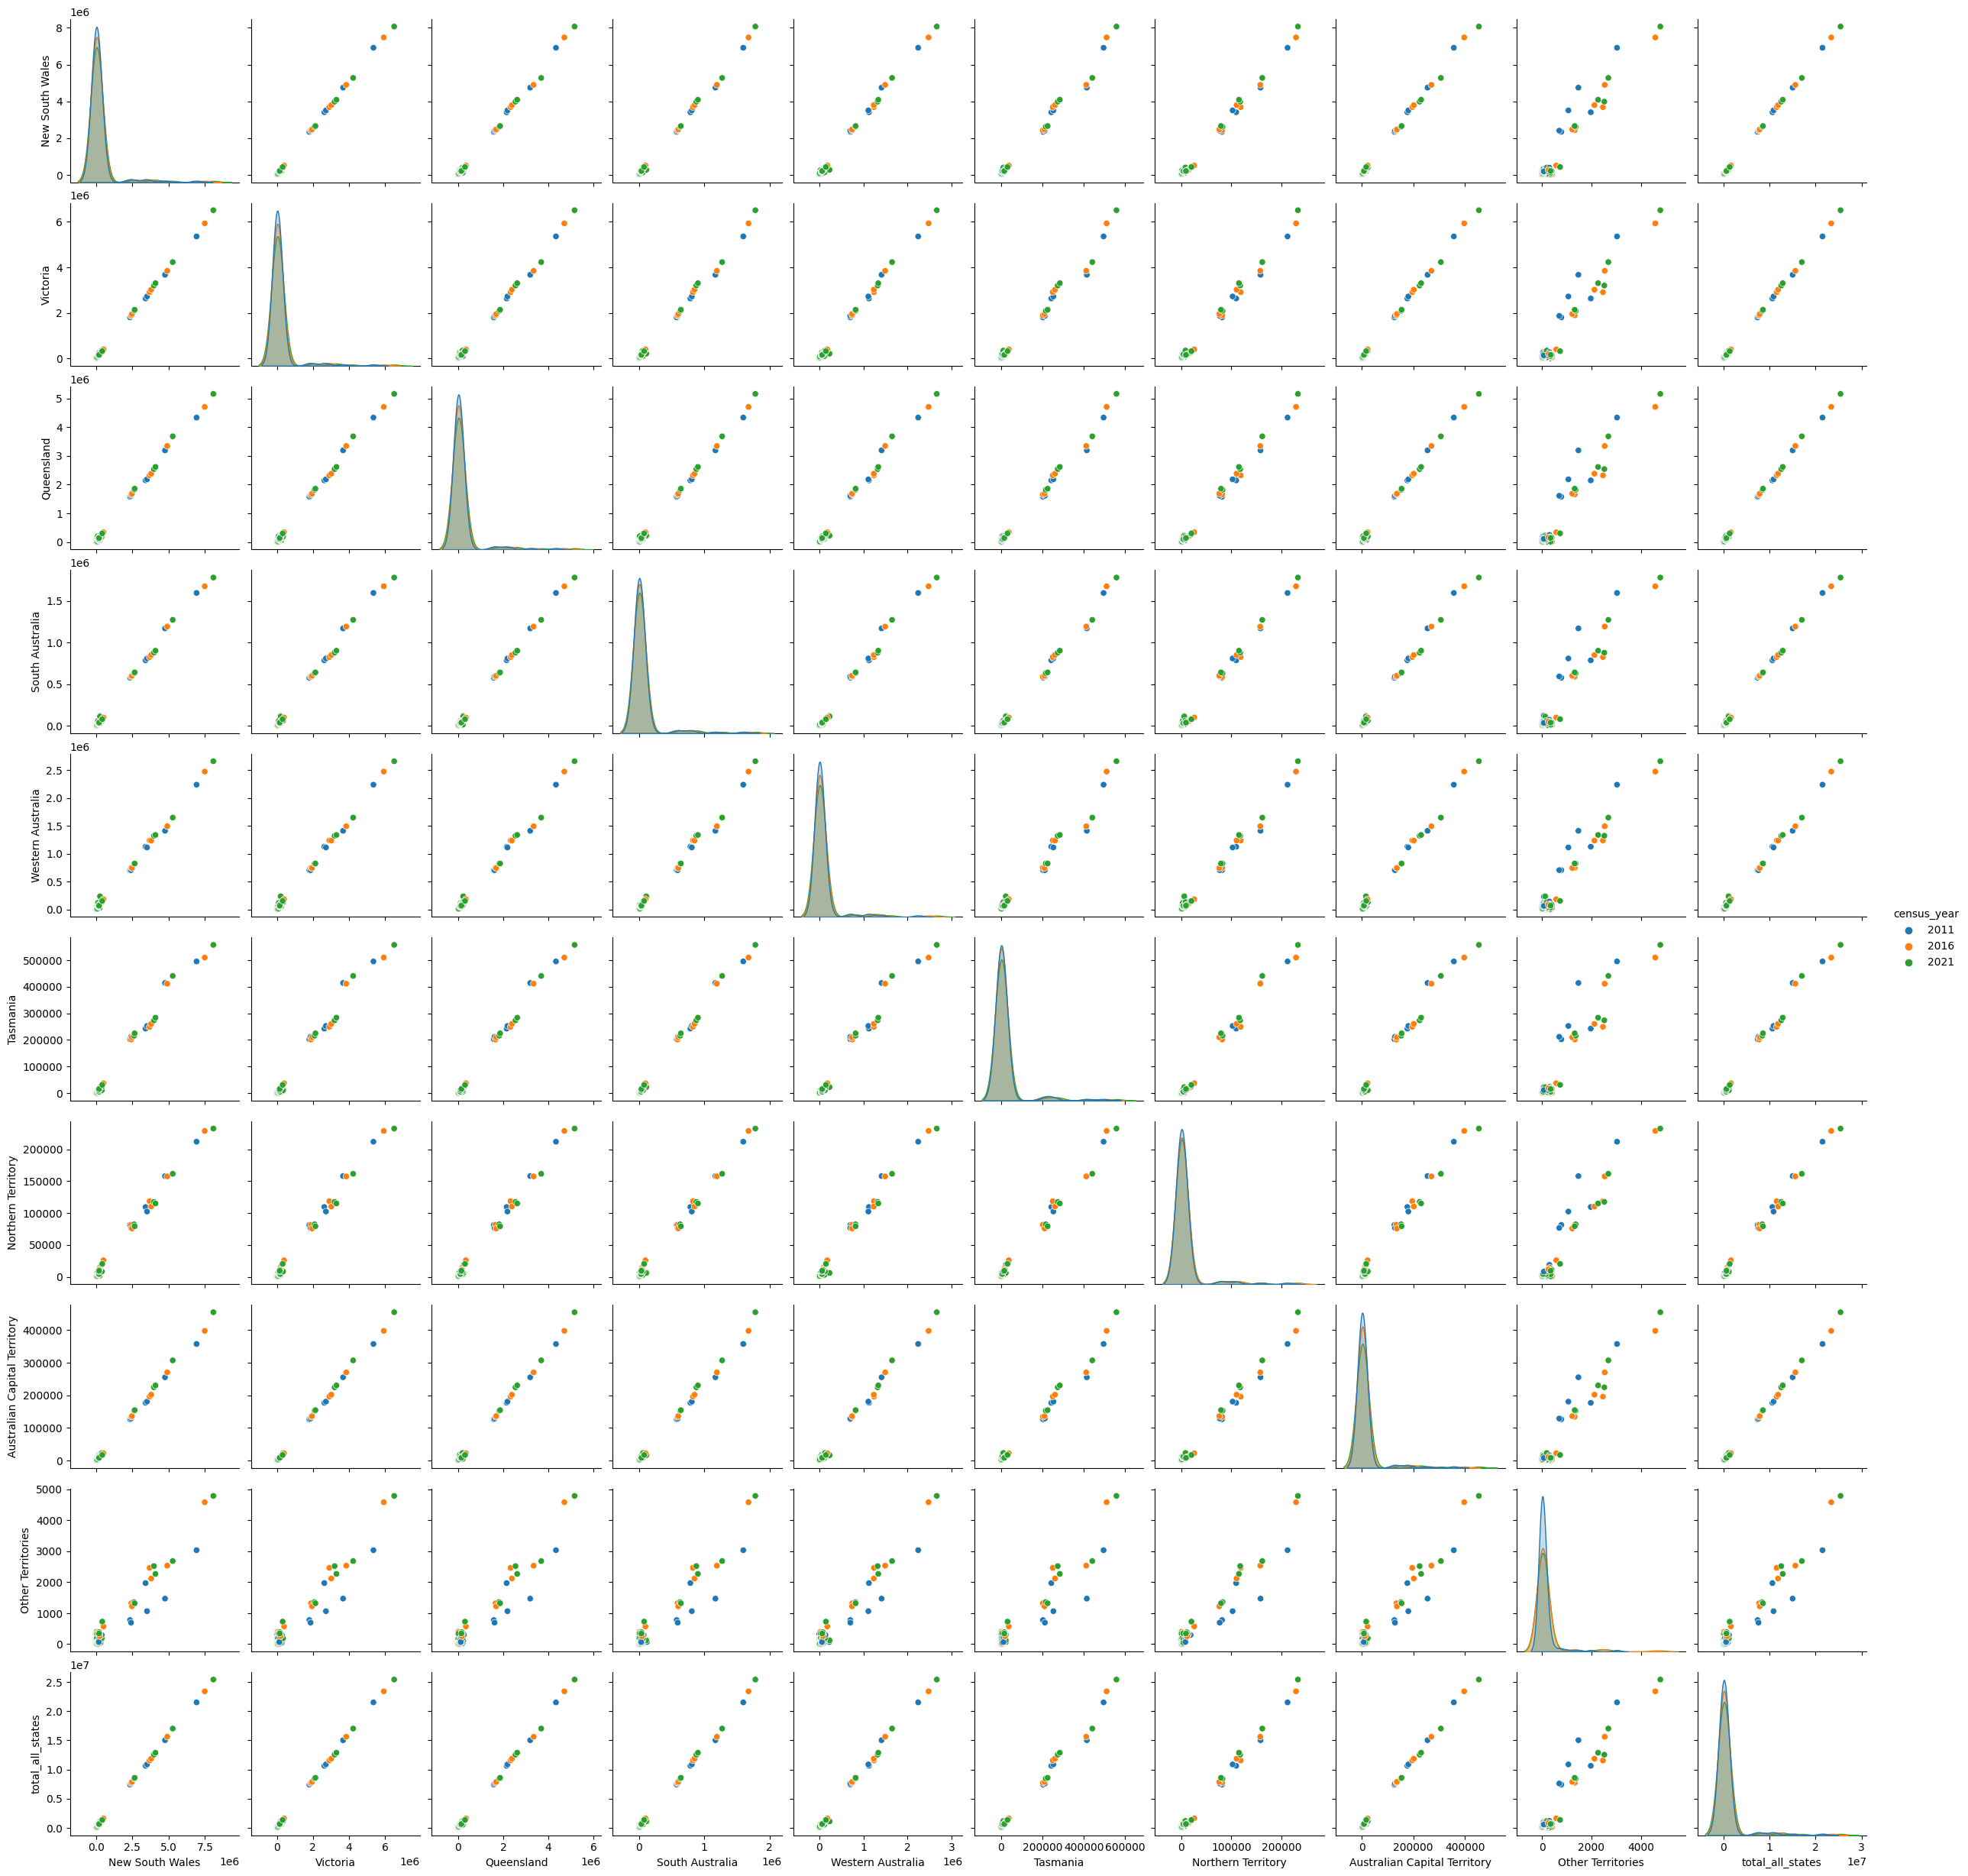

In [67]:
#Pairplot for the migration dataset
sns.pairplot(df_migration_details, hue='census_year')

<AxesSubplot:>

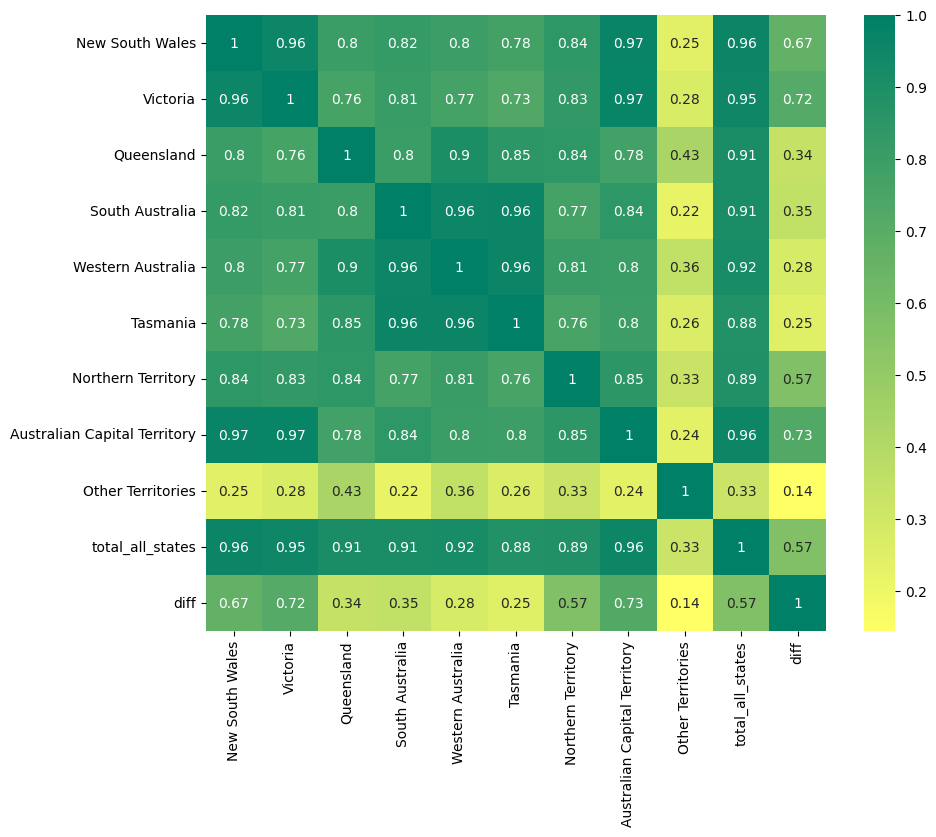

In [68]:
#Plotting Heatmap for Correlation between different attributes of the migration dataset
corr = df_people_migration_details.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap = 'summer_r')
#Higher the value more correlated the two variables

In [69]:
#Checking immigration from various countries from 2011 until 2021
size = df_people_migration_details.iloc[:,13]
#print(size)

plot = go.Figure(data=[go.Scatter(
    x=df_people_migration_details['country'],
    y=df_people_migration_details['Victoria'],
    mode='markers',
    marker=dict(
        size=size,
        sizemode='area',
        sizeref=2.*max(size)/(60.**2),
        sizemin=4
    )
)])
plot.show()

#### Observation:
* There is a steady and sharp increase in the number of people migrating from India and China.

In [70]:
#Checking migration to different states from 2011 until 2021
columns = df_people_migration_details.columns[1:10]
plot1 = go.Figure()
plot2 = go.Figure()
plot3 = go.Figure()

size = df_people_migration_details.iloc[:,13]

sizeref = 2.*max(df_people_migration_details['total_all_states'])/(100**2)
df_people_migration_details_2011 = df_people_migration_details.query("census_year=='2011'")
df_people_migration_details_2016 = df_people_migration_details.query("census_year=='2016'")
df_people_migration_details_2021 = df_people_migration_details.query("census_year=='2021'")

#Adding bars
for cols in columns:
    plot1.add_trace(go.Scatter(
        x=df_people_migration_details_2011['country'], y=df_people_migration_details_2011[cols],
        name=cols, 
        marker_size=df_people_migration_details_2011[cols]
        ))

    plot2.add_trace(go.Scatter(
        x=df_people_migration_details_2016['country'], y=df_people_migration_details_2016[cols],
        name=cols, 
        marker_size=df_people_migration_details_2016[cols]
        ))

    plot3.add_trace(go.Scatter(
        x=df_people_migration_details_2021['country'], y=df_people_migration_details_2021[cols],
        name=cols, 
        marker_size=df_people_migration_details_2021[cols]
        ))

plot1.update_traces(mode='markers', marker=dict(sizemode='area',sizeref=sizeref, line_width=2))
plot2.update_traces(mode='markers', marker=dict(sizemode='area',sizeref=sizeref, line_width=2))
plot3.update_traces(mode='markers', marker=dict(sizemode='area',sizeref=sizeref, line_width=2))

plot1.update_layout(title='Migration in Census year 2011')
plot2.update_layout(title='Migration in Census year 2016')
plot3.update_layout(title='Migration in Census year 2021')

plot1.show()
plot2.show()
plot3.show()


##### Observations:
* NSW, Victoria and Queensland are the top choices among migrants for 3 censuses. 

* Indians prefer Victoria whereas, Chinese and British people preferred NSW. 

* Queensland is the favourite destination for people migrating from New Zealand.  

In [71]:
#Showing the total number of people migrated to Australia from different countries
plot = px.choropleth(df_people_migration_details, locations="iso_code",
                    color="total_all_states", 
                    hover_name="country", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    facet_col='census_year')
plot.show()

#### Observation:
* During the period from 2011 until 2021, a large number of migrants are from China and India. 